# Do the wavelength study for the hollow glass tube with polymer

Do it for both lossy and non-lossy polymer.  Both with air outside.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from scipy.optimize import newton

importing NGSolve-6.2.2203-56-g47f483033


# Initialize

In [2]:
n = 500
wls = np.linspace(3.11e-6, 3.6e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5

In [3]:
ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, 15*2.7183333333333333e-6, 15*2e-6]
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly, lambda x:n_air]
mats = ['air','glass', 'polymer','air']
maxhs = [10,10,10,10]

In [4]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/501: wavelength: 3.11e-06  --------------------     

scaling guess: 1
Scaled beta:  (30.304212879119174-0.001096536813326984j) . Residual of determinant:  8.481916810242303e-14 


     --------------------  2/501: wavelength: 3.11098e-06  --------------------     

Scaled beta:  (30.293764515157996-0.0007395375163767797j) . Residual of determinant:  3.908020529499657e-15 


     --------------------  3/501: wavelength: 3.1119599999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (30.28364698707429-0.0005271037766154355j) . Residual of determinant:  3.7969627442180354e-13 


     --------------------  4/501: wavelength: 3.1129399999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (30.273709048132968-0.0003933250640263714j) . Residual of determinant:  9.632990617425582e-13 


     --------------------  5/501: wavelength: 3.11392e-06  --------------------     

Scaled beta:  (30.263881245168367-0.00030445756964809226j

Scaled beta:  (29.922789629109655-2.3312213233344986e-05j) . Residual of determinant:  2.5256052636868627e-12 


     --------------------  42/501: wavelength: 3.15018e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.9134559692059-2.329320025944204e-05j) . Residual of determinant:  2.490410787374758e-11 


     --------------------  43/501: wavelength: 3.1511599999999997e-06  --------------------     

Scaled beta:  (29.904128116735922-2.3329962249959e-05j) . Residual of determinant:  2.4222454230401323e-12 


     --------------------  44/501: wavelength: 3.1521399999999997e-06  --------------------     

Scaled beta:  (29.894806026022017-2.3422688065737935e-05j) . Residual of determinant:  1.2282425370508922e-11 


     --------------------  45/501: wavelength: 3.15312e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (29.885489651319958-2.357210127327223e-05j) . Residual of determinant:  4.866168231035894e-11 


     ------------------

Scaled beta:  (29.543437713819298-0.0004666780669985615j) . Residual of determinant:  7.670996870618458e-13 


     --------------------  83/501: wavelength: 3.1903599999999997e-06  --------------------     

Scaled beta:  (29.534051952687648-0.0006154630180487668j) . Residual of determinant:  3.392218504177165e-13 


     --------------------  84/501: wavelength: 3.1913399999999997e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (29.524589881861868-0.0008387001268091625j) . Residual of determinant:  3.013917723420882e-13 


     --------------------  85/501: wavelength: 3.19232e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.51502116164863-0.001184917460201216j) . Residual of determinant:  1.2753371702189095e-13 


     --------------------  86/501: wavelength: 3.1933e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.50530172685501-0.001737116178175361j) . Residual of

Scaled beta:  (29.168900593879002-2.8813074180057252e-05j) . Residual of determinant:  1.075246270717511e-13 


     --------------------  125/501: wavelength: 3.23152e-06  --------------------     

Scaled beta:  (29.160027672371893-2.8150237869813734e-05j) . Residual of determinant:  1.0688676242029346e-11 


     --------------------  126/501: wavelength: 3.2325e-06  --------------------     

Scaled beta:  (29.15116055885519-2.756949480146449e-05j) . Residual of determinant:  1.2203110840473469e-11 


     --------------------  127/501: wavelength: 3.23348e-06  --------------------     

Scaled beta:  (29.142299193847233-2.7064866073265588e-05j) . Residual of determinant:  1.7618281099063624e-11 


     --------------------  128/501: wavelength: 3.23446e-06  --------------------     

Scaled beta:  (29.133443521866795-2.6631290528040336e-05j) . Residual of determinant:  1.2739202118321442e-11 


     --------------------  129/501: wavelength: 3.23544e-06  --------------------     


Scaled beta:  (28.783244202318524-0.00010641103697019872j) . Residual of determinant:  5.750262515252147e-13 


     --------------------  169/501: wavelength: 3.2746399999999998e-06  --------------------     

Scaled beta:  (28.774552732145995-0.00011940824282862339j) . Residual of determinant:  4.083097621366149e-12 


     --------------------  170/501: wavelength: 3.2756199999999997e-06  --------------------     

Scaled beta:  (28.765858109166953-0.00013514308892018987j) . Residual of determinant:  7.580677281919084e-13 


     --------------------  171/501: wavelength: 3.2765999999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (28.757158617718737-0.00015441448296491406j) . Residual of determinant:  7.195964126599709e-13 


     --------------------  172/501: wavelength: 3.27758e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (28.748452061173523-0.0001783269845969174j) . Residual of determinant:  3.72063680581

Scaled beta:  (28.460707226327997-6.333950049343168e-05j) . Residual of determinant:  3.586710909894902e-12 


     --------------------  207/501: wavelength: 3.31188e-06  --------------------     

Scaled beta:  (28.452239790913083-5.908680307678208e-05j) . Residual of determinant:  1.4375405034917725e-11 


     --------------------  208/501: wavelength: 3.31286e-06  --------------------     

Scaled beta:  (28.443779863328686-5.535344542846627e-05j) . Residual of determinant:  2.3817978426271538e-11 


     --------------------  209/501: wavelength: 3.3138399999999998e-06  --------------------     

Scaled beta:  (28.435327134328464-5.206221312942045e-05j) . Residual of determinant:  6.6845167007920654e-12 


     --------------------  210/501: wavelength: 3.3148199999999997e-06  --------------------     

Scaled beta:  (28.426881339370503-4.914992328847571e-05j) . Residual of determinant:  8.435408085268753e-12 


     --------------------  211/501: wavelength: 3.3157999999999997e-

Scaled beta:  (28.08532073798373-3.684070114683244e-05j) . Residual of determinant:  6.0314420360420675e-12 


     --------------------  252/501: wavelength: 3.35598e-06  --------------------     

Scaled beta:  (28.077089286710233-3.822190126066397e-05j) . Residual of determinant:  1.3111443977375006e-11 


     --------------------  253/501: wavelength: 3.35696e-06  --------------------     

Scaled beta:  (28.06886182178893-3.975399981765903e-05j) . Residual of determinant:  2.336838438092277e-12 


     --------------------  254/501: wavelength: 3.35794e-06  --------------------     

Scaled beta:  (28.060638251745047-4.145462080816893e-05j) . Residual of determinant:  1.1696348802319114e-11 


     --------------------  255/501: wavelength: 3.35892e-06  --------------------     

Scaled beta:  (28.052418475058392-4.3344337866514135e-05j) . Residual of determinant:  1.3622750686261679e-11 


     --------------------  256/501: wavelength: 3.3599e-06  --------------------     

Sca

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (27.77260766412027-0.0010634690626486077j) . Residual of determinant:  3.8952422925420237e-13 


     --------------------  291/501: wavelength: 3.3941999999999996e-06  --------------------     

Scaled beta:  (27.764009817931264-0.0007994898421511221j) . Residual of determinant:  6.762516560723728e-13 


     --------------------  292/501: wavelength: 3.39518e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (27.75556382398387-0.0006187993579291607j) . Residual of determinant:  2.084487412817099e-13 


     --------------------  293/501: wavelength: 3.39616e-06  --------------------     

Scaled beta:  (27.74721920021443-0.0004913600719967186j) . Residual of determinant:  8.584206806242652e-14 


     --------------------  294/501: wavelength: 3.39714e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.7389463

Scaled beta:  (27.459513189035295-3.207186078109487e-05j) . Residual of determinant:  2.741005520119381e-12 


     --------------------  330/501: wavelength: 3.43242e-06  --------------------     

Scaled beta:  (27.451647612816746-3.1585686448216944e-05j) . Residual of determinant:  2.1661793875166604e-11 


     --------------------  331/501: wavelength: 3.4334e-06  --------------------     

Scaled beta:  (27.443786781744986-3.1163107950199276e-05j) . Residual of determinant:  1.5093936847494217e-11 


     --------------------  332/501: wavelength: 3.43438e-06  --------------------     

Scaled beta:  (27.435930657445216-3.080089493676825e-05j) . Residual of determinant:  3.346724170990196e-13 


     --------------------  333/501: wavelength: 3.43536e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.428079203335177-3.0496315534231943e-05j) . Residual of determinant:  3.0519738790095756e-12 


     --------------------  334/501: wavelength: 3.43634e-06  ----------

Scaled beta:  (27.148228915251334-7.188263404839286e-05j) . Residual of determinant:  1.278722781403533e-12 


     --------------------  370/501: wavelength: 3.4716199999999996e-06  --------------------     

Scaled beta:  (27.140519092407214-7.69545194006944e-05j) . Residual of determinant:  3.226355513366927e-12 


     --------------------  371/501: wavelength: 3.4726e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.13281102666401-8.270320399139153e-05j) . Residual of determinant:  5.035533523112167e-12 


     --------------------  372/501: wavelength: 3.47358e-06  --------------------     

Scaled beta:  (27.12510438209208-8.924877804167701e-05j) . Residual of determinant:  2.0097183471152322e-14 


     --------------------  373/501: wavelength: 3.47456e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.117398766288492-9.673910146056038e-05j) . Residual of determinant:  4.411736816611855e-12 


     --------------------  374/501: wavelength: 3.4

scaling guess: 1
Scaled beta:  (26.86187066181116-0.00022647854714413738j) . Residual of determinant:  9.130181811806988e-13 


     --------------------  408/501: wavelength: 3.5088599999999997e-06  --------------------     

Scaled beta:  (26.854244929048505-0.00019919050940244535j) . Residual of determinant:  1.208963138789272e-12 


     --------------------  409/501: wavelength: 3.5098399999999997e-06  --------------------     

Scaled beta:  (26.846637478248535-0.00017675422687429184j) . Residual of determinant:  1.4219601968302415e-12 


     --------------------  410/501: wavelength: 3.51082e-06  --------------------     

Scaled beta:  (26.839045777851766-0.0001581000154410082j) . Residual of determinant:  1.5871157048095394e-12 


     --------------------  411/501: wavelength: 3.5118e-06  --------------------     

Scaled beta:  (26.831467861075573-0.00014243488249443694j) . Residual of determinant:  5.863113201351457e-12 


     --------------------  412/501: wavelength: 3.

Scaled beta:  (26.570607111077457-3.321505367980064e-05j) . Residual of determinant:  3.5095677675237872e-12 


     --------------------  447/501: wavelength: 3.5470799999999998e-06  --------------------     

Scaled beta:  (26.563241461820166-3.304850002737366e-05j) . Residual of determinant:  4.9693769107277334e-12 


     --------------------  448/501: wavelength: 3.5480599999999997e-06  --------------------     

Scaled beta:  (26.55587995866101-3.293196692285071e-05j) . Residual of determinant:  2.0485017620873807e-11 


     --------------------  449/501: wavelength: 3.5490399999999997e-06  --------------------     

Scaled beta:  (26.548522573406075-3.286463715774194e-05j) . Residual of determinant:  9.263407124170416e-12 


     --------------------  450/501: wavelength: 3.55002e-06  --------------------     

Scaled beta:  (26.541169278334834-3.284598953666383e-05j) . Residual of determinant:  1.4163619378646297e-11 


     --------------------  451/501: wavelength: 3.551e-06

scaling guess: 1
scaling guess: 2
Scaled beta:  (26.286097667038668-9.360372177371491e-05j) . Residual of determinant:  1.0387861755817732e-12 


     --------------------  486/501: wavelength: 3.5853e-06  --------------------     

Scaled beta:  (26.27885982840818-0.00010066591843514913j) . Residual of determinant:  2.238294292576486e-12 


     --------------------  487/501: wavelength: 3.5862799999999997e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (26.271622728101335-0.00010869115210856405j) . Residual of determinant:  5.368965247991522e-12 


     --------------------  488/501: wavelength: 3.5872599999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.2643859480127-0.00011785585115274918j) . Residual of determinant:  4.998729081715871e-12 


     --------------------  489/501: wavelength: 3.58824e-06  --------------------     

Scaled beta:  (26.257148998748274-0.00012837830355745886j) . Residual of determinant:  8.43703117

<IPython.core.display.Javascript object>


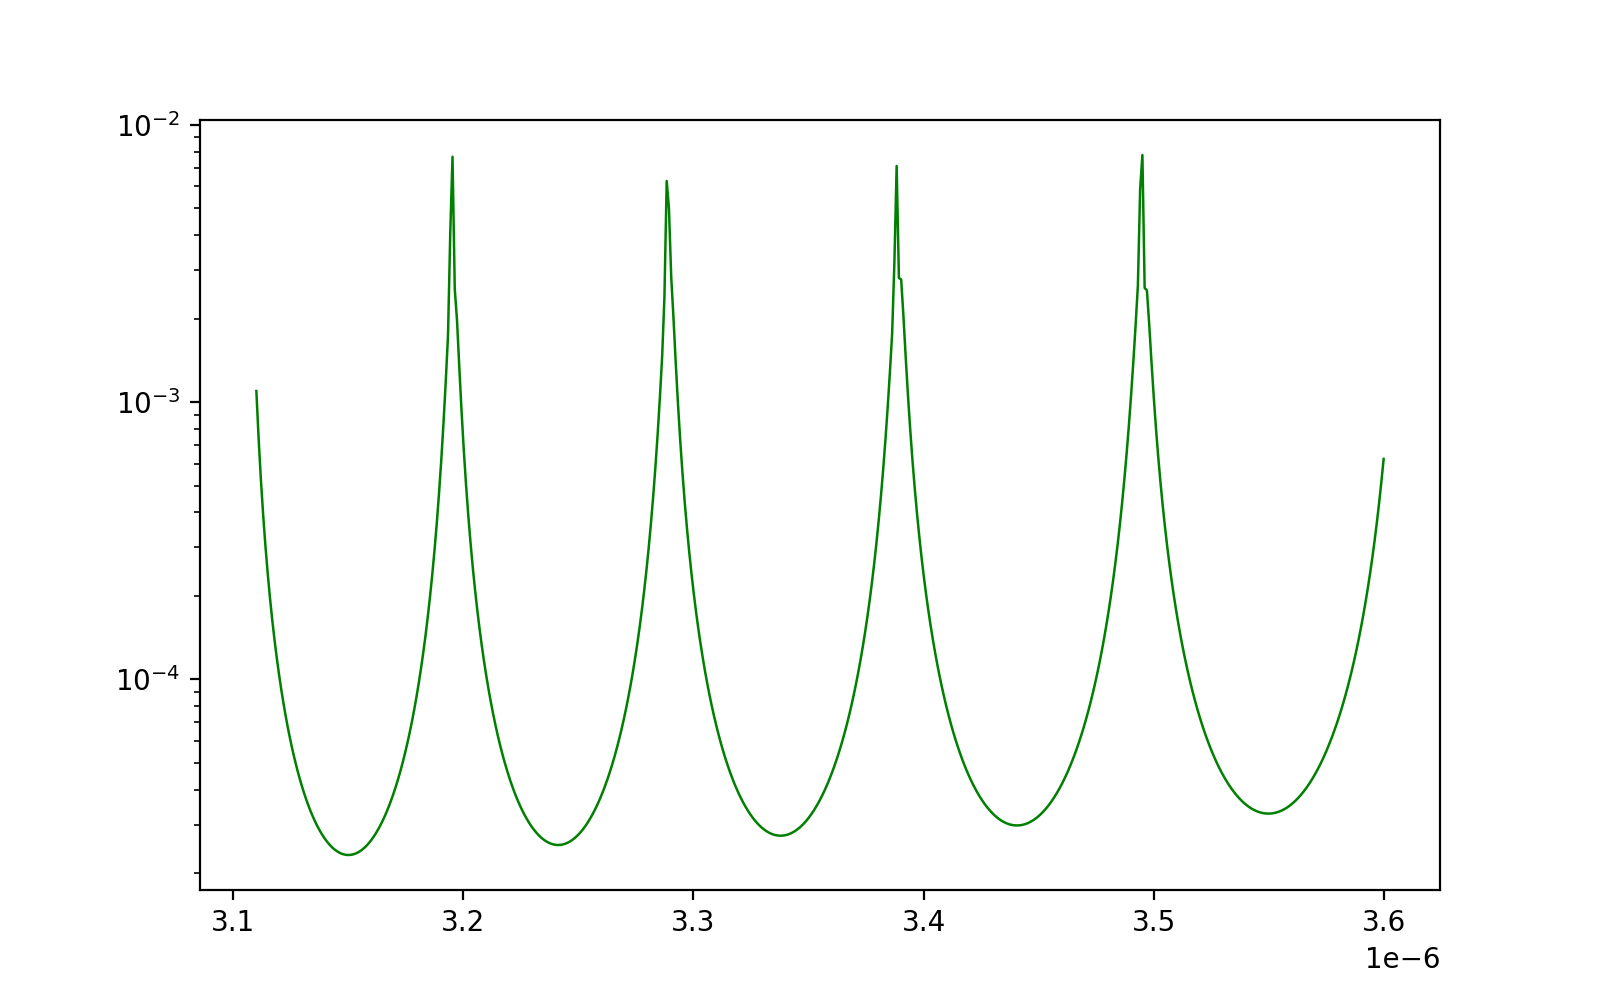

In [6]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)

plt.yscale('log')


# We have double the resonators

Makes sense that we might get more spikes: the resonators are interacting.  What about adding loss to polymer?

# Light Loss Polymer

In [7]:
# n = 300
wls = np.linspace(3.11e-6, 3.6e-6, n+1)
betas2 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5 - .002j

In [3]:
ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, 15*2.7183333333333333e-6, 15*2e-6]
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly, lambda x:n_air]
mats = ['air','glass', 'polymer','air']
maxhs = [10,10,10,10]

In [8]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

     --------------------  1/501: wavelength: 3.11e-06  --------------------     

scaling guess: 1
Scaled beta:  (30.300817503791677-0.0016227270069525768j) . Residual of determinant:  2.0798187542823816e-13 


     --------------------  2/501: wavelength: 3.11098e-06  --------------------     

Scaled beta:  (30.291402061723794-0.001468896872033526j) . Residual of determinant:  1.321773199896996e-12 


     --------------------  3/501: wavelength: 3.1119599999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (30.281942718634593-0.0013069173169607442j) . Residual of determinant:  8.854103448013104e-14 


     --------------------  4/501: wavelength: 3.1129399999999997e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (30.27244819548346-0.001151755033726363j) . Residual of determinant:  1.062918501871186e-12 


     --------------------  5/501: wavelength: 3.11392e-06  --------------------     

scaling

Scaled beta:  (29.913455326414702-0.0001263397016785589j) . Residual of determinant:  2.7166089454130297e-12 


     --------------------  43/501: wavelength: 3.1511599999999997e-06  --------------------     

Scaled beta:  (29.904128573124872-0.00012635947316279653j) . Residual of determinant:  4.1776172112179304e-11 


     --------------------  44/501: wavelength: 3.1521399999999997e-06  --------------------     

Scaled beta:  (29.8948075855696-0.00012666309957500802j) . Residual of determinant:  2.4664482898456046e-11 


     --------------------  45/501: wavelength: 3.15312e-06  --------------------     

Scaled beta:  (29.885492328067976-0.00012725255995817153j) . Residual of determinant:  2.490196338396097e-12 


     --------------------  46/501: wavelength: 3.1541e-06  --------------------     

Scaled beta:  (29.876182764726988-0.00012813231441357692j) . Residual of determinant:  7.124267511795067e-12 


     --------------------  47/501: wavelength: 3.15508e-06  -----------

scaling guess: 1
scaling guess: 2
Scaled beta:  (29.553641739624712-0.0010040637854810423j) . Residual of determinant:  2.1778489829741028e-14 


     --------------------  82/501: wavelength: 3.1893799999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (29.544552839946974-0.0011368003692746216j) . Residual of determinant:  6.078347666659699e-13 


     --------------------  83/501: wavelength: 3.1903599999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.53549162446684-0.0012860791942318377j) . Residual of determinant:  2.7295875277334778e-12 


     --------------------  84/501: wavelength: 3.1913399999999997e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (29.526466874688843-0.0014492272778715946j) . Residual of determinant:  2.1809038777691906e-12 


     --------------------  85/501: wavelength: 3.19232e-06  --------------------     

Scaled beta:  (29.517488576638-0.0016193322747838185j)

Scaled beta:  (29.21332924940859-0.0001738153437740296j) . Residual of determinant:  1.829380968159393e-11 


     --------------------  120/501: wavelength: 3.22662e-06  --------------------     

Scaled beta:  (29.204428881618206-0.0001678665066432851j) . Residual of determinant:  2.7486920079518112e-11 


     --------------------  121/501: wavelength: 3.2276e-06  --------------------     

Scaled beta:  (29.19553443968988-0.0001625328374427325j) . Residual of determinant:  1.8809844920977974e-11 


     --------------------  122/501: wavelength: 3.2285799999999998e-06  --------------------     

Scaled beta:  (29.18664586961125-0.0001577570265374818j) . Residual of determinant:  1.7645467845541588e-11 


     --------------------  123/501: wavelength: 3.2295599999999997e-06  --------------------     

Scaled beta:  (29.177763120420696-0.00015348960503831806j) . Residual of determinant:  5.380655313380084e-12 


     --------------------  124/501: wavelength: 3.23054e-06  ----------

scaling guess: 1
Scaled beta:  (28.86153841296177-0.0002377505913785472j) . Residual of determinant:  6.837051001146492e-12 


     --------------------  160/501: wavelength: 3.26582e-06  --------------------     

Scaled beta:  (28.852843779550785-0.00025144181939976834j) . Residual of determinant:  6.267209803971959e-12 


     --------------------  161/501: wavelength: 3.2668e-06  --------------------     

Scaled beta:  (28.84415328912987-0.0002667663578785616j) . Residual of determinant:  7.83633014632638e-12 


     --------------------  162/501: wavelength: 3.2677799999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (28.835466869850187-0.0002839591555803398j) . Residual of determinant:  5.478070363799539e-12 


     --------------------  163/501: wavelength: 3.2687599999999997e-06  --------------------     

Scaled beta:  (28.82678445397398-0.00030329738806310466j) . Residual of determinant:  2.696919804560056e-13 


     --------------------  164/501: wave

Scaled beta:  (28.545538786159277-0.0006802610228031423j) . Residual of determinant:  5.752415946951149e-13 


     --------------------  197/501: wavelength: 3.30208e-06  --------------------     

Scaled beta:  (28.537021914820034-0.0006135195411372752j) . Residual of determinant:  2.4902068418306354e-12 


     --------------------  198/501: wavelength: 3.30306e-06  --------------------     

Scaled beta:  (28.528509535769437-0.0005559111393966829j) . Residual of determinant:  2.764393142522221e-12 


     --------------------  199/501: wavelength: 3.30404e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (28.520002428432363-0.0005060468948448813j) . Residual of determinant:  2.6980191867827704e-12 


     --------------------  200/501: wavelength: 3.30502e-06  --------------------     

Scaled beta:  (28.511501086723843-0.00046274561631253j) . Residual of determinant:  3.96227350488337

Scaled beta:  (28.19272630062754-0.00013561866973699509j) . Residual of determinant:  3.360805624307391e-11 


     --------------------  239/501: wavelength: 3.34324e-06  --------------------     

Scaled beta:  (28.184438471232973-0.00013669520164054036j) . Residual of determinant:  9.741678570714163e-12 


     --------------------  240/501: wavelength: 3.34422e-06  --------------------     

Scaled beta:  (28.176155370757847-0.0001380261917891487j) . Residual of determinant:  1.432144669219779e-14 


     --------------------  241/501: wavelength: 3.3451999999999998e-06  --------------------     

Scaled beta:  (28.16787696997842-0.00013962042956606473j) . Residual of determinant:  1.583889509700864e-11 


     --------------------  242/501: wavelength: 3.3461799999999997e-06  --------------------     

Scaled beta:  (28.15960323901003-0.00014148867009635506j) . Residual of determinant:  1.2612620922596214e-11 


     --------------------  243/501: wavelength: 3.3471599999999996e-0

Scaled beta:  (27.864599413129106-0.0011458996520245174j) . Residual of determinant:  3.446948386020533e-13 


     --------------------  279/501: wavelength: 3.38244e-06  --------------------     

Scaled beta:  (27.856520086024155-0.0012843758476988349j) . Residual of determinant:  2.1743100800981398e-12 


     --------------------  280/501: wavelength: 3.3834199999999998e-06  --------------------     

Scaled beta:  (27.848466662453827-0.0014386244946227424j) . Residual of determinant:  1.1134812556552714e-12 


     --------------------  281/501: wavelength: 3.3843999999999997e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (27.840446880360545-0.0016064142008686074j) . Residual of determinant:  1.2490091972753342e-12 


     --------------------  282/501: wavelength: 3.3853799999999997e-06  --------------------     

Scaled beta:  (27.832469589736295-0.0017821567692521206j) . Residual of determinant:  9.058686522419

Scaled beta:  (27.546328597435323-0.00019948297896579435j) . Residual of determinant:  3.2171190647067566e-14 


     --------------------  319/501: wavelength: 3.42164e-06  --------------------     

Scaled beta:  (27.53841049597405-0.00019237723160807148j) . Residual of determinant:  3.2779840311563136e-12 


     --------------------  320/501: wavelength: 3.4226199999999998e-06  --------------------     

Scaled beta:  (27.530497493515956-0.00018592437430127275j) . Residual of determinant:  3.860256791927826e-14 


     --------------------  321/501: wavelength: 3.4235999999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.52258954095387-0.0001800639992781013j) . Residual of determinant:  5.564485646017915e-12 


     --------------------  322/501: wavelength: 3.4245799999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.51468659187647-0.00017474327538914757j) . Residual of determinant:  6.295130199769429e-13 


     ------------------

scaling guess: 1
Scaled beta:  (27.225501094596524-0.00019075955422751678j) . Residual of determinant:  8.341313241747026e-12 


     --------------------  360/501: wavelength: 3.4618199999999997e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (27.21776542368008-0.00019748417747339616j) . Residual of determinant:  4.521205049283548e-12 


     --------------------  361/501: wavelength: 3.4627999999999997e-06  --------------------     

Scaled beta:  (27.21003353632086-0.00020485803254582154j) . Residual of determinant:  6.317622089739013e-12 


     --------------------  362/501: wavelength: 3.46378e-06  --------------------     

Scaled beta:  (27.20230538433102-0.00021294724121528023j) . Residual of determinant:  1.4453619614224915e-11 


     --------------------  363/501: wavelength: 3.46476e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.194580917163293-0.00022182720449801077j) . Residual of determinant:  1.0852131213409143e-11 



Scaled beta:  (26.93629205796438-0.002276965155872673j) . Residual of determinant:  5.907956141965233e-13 


     --------------------  398/501: wavelength: 3.49906e-06  --------------------     

Scaled beta:  (26.92894226022191-0.0021174210971685696j) . Residual of determinant:  6.951200958671983e-13 


     --------------------  399/501: wavelength: 3.5000399999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (26.921542921751854-0.001934195106741016j) . Residual of determinant:  2.1796189156873803e-12 


     --------------------  400/501: wavelength: 3.5010199999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.914097753195218-0.0017461134300172062j) . Residual of determinant:  1.84865469131373e-13 


     --------------------  401/501: wavelength: 3.5019999999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.906615402457813-0.001

Scaled beta:  (26.651893366566302-0.0001738648444941799j) . Residual of determinant:  2.2732877636660325e-12 


     --------------------  436/501: wavelength: 3.5363e-06  --------------------     

Scaled beta:  (26.644481641014643-0.00016999086956249708j) . Residual of determinant:  2.0785544871826675e-11 


     --------------------  437/501: wavelength: 3.53728e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (26.63707433458272-0.00016647590315423943j) . Residual of determinant:  3.4861879826247173e-13 


     --------------------  438/501: wavelength: 3.53826e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.629671415192554-0.000163295906292564j) . Residual of determinant:  3.879491863442831e-12 


     --------------------  439/501: wavelength: 3.5392399999999998e-06  --------------------     

Scaled beta:  (26.622272852201636-0.00016042965868666502j) . Residual of determinant:  5.528252872095653e-12 


     --------------------  4

scaling guess: 1
Scaled beta:  (26.365874229880717-0.00021583759143173315j) . Residual of determinant:  7.122099833740187e-12 


     --------------------  475/501: wavelength: 3.57452e-06  --------------------     

Scaled beta:  (26.358615710361217-0.00022382257260041344j) . Residual of determinant:  1.1818140400468711e-11 


     --------------------  476/501: wavelength: 3.5755e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (26.351360508768497-0.00023253986512800255j) . Residual of determinant:  1.8669861086741932e-12 


     --------------------  477/501: wavelength: 3.57648e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.344108576723613-0.00024206405880491475j) . Residual of determinant:  3.2125221905791966e-12 


     --------------------  478/501: wavelength: 3.57746e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.33685986372846-0.0002524798556340456j) . Residual of determinant:  3.264590730729328e-12 


   

<IPython.core.display.Javascript object>


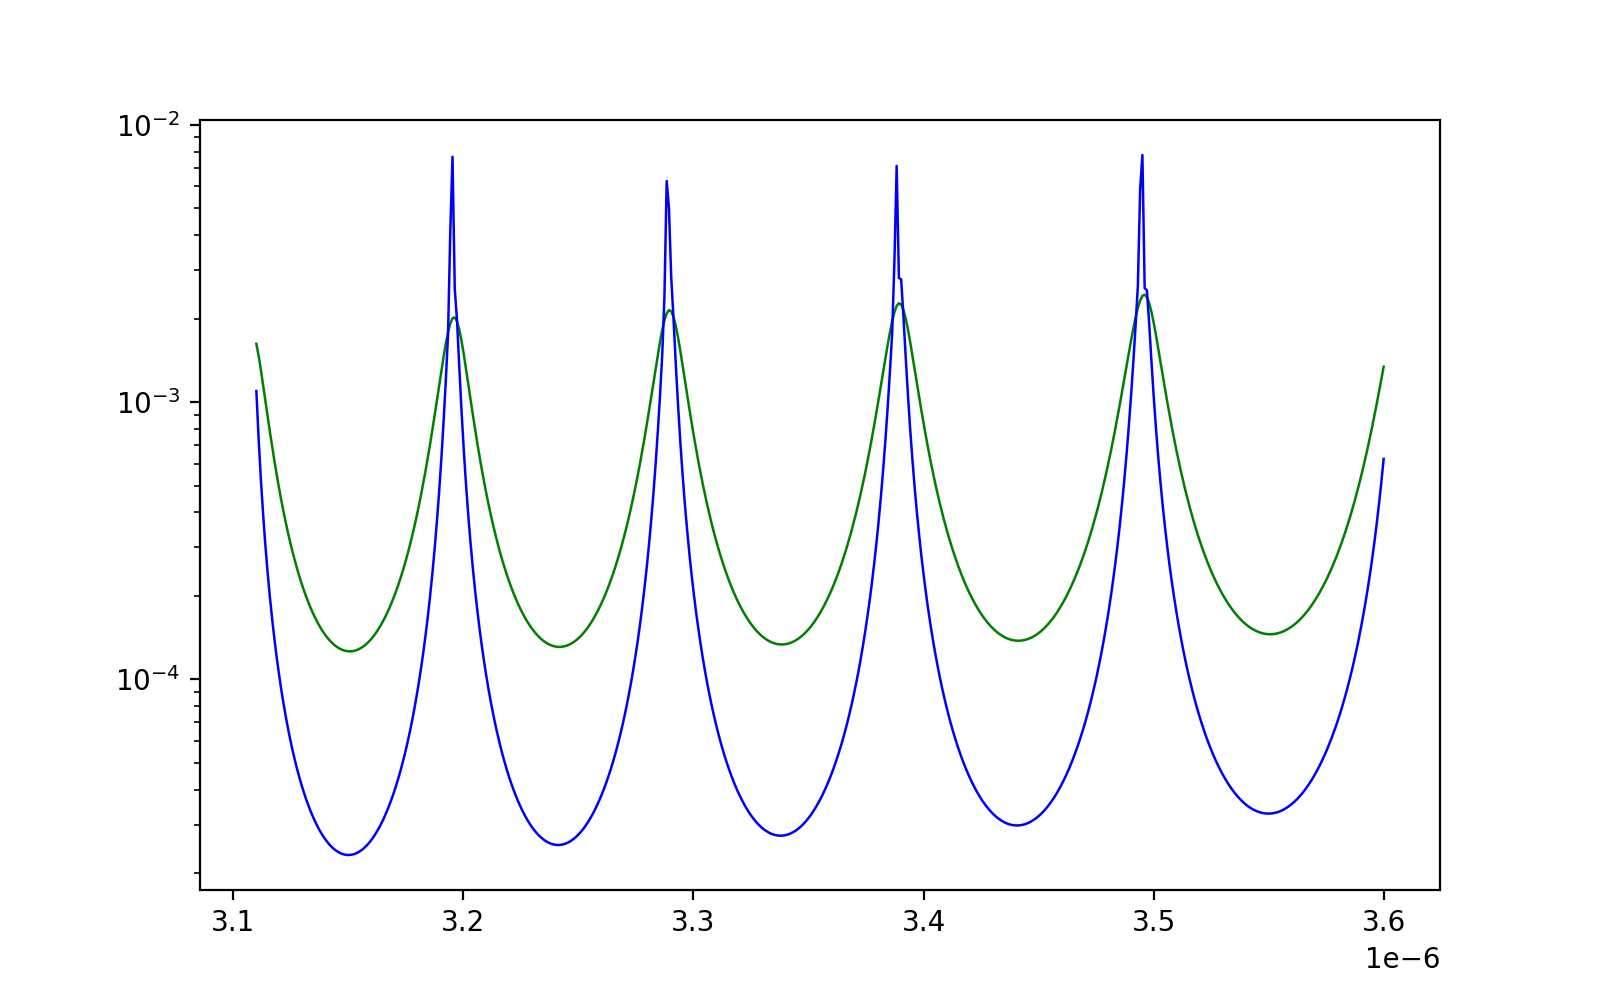

In [9]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas2.imag, color='green', linewidth=.9)
plt.plot(wls, -betas1.imag, color='blue', linewidth=.9)

plt.yscale('log')

In [34]:
# np.save('data/k_002_scaled_betas', betas2)

# Medium Loss polymer

In [10]:
# wls = np.linspace(3.11e-6, 3.6e-6, n+1)
betas3 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5 - .005j

In [3]:
ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, 15*2.7183333333333333e-6, 15*2e-6]
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly, lambda x:n_air]
mats = ['air','glass', 'polymer','air']
maxhs = [10,10,10,10]

In [11]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas3[i] = beta
    

     --------------------  1/501: wavelength: 3.11e-06  --------------------     

Scaled beta:  (30.30035559787883-0.0008581598431564669j) . Residual of determinant:  5.233521153806421e-13 


     --------------------  2/501: wavelength: 3.11098e-06  --------------------     

Scaled beta:  (30.290839797074327-0.0008423926668162306j) . Residual of determinant:  4.081603730827455e-12 


     --------------------  3/501: wavelength: 3.1119599999999998e-06  --------------------     

Scaled beta:  (30.281326882767228-0.000822410621371515j) . Residual of determinant:  1.0300634623711157e-12 


     --------------------  4/501: wavelength: 3.1129399999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (30.27181632377619-0.0007989581300121563j) . Residual of determinant:  1.6340423503992323e-11 


     --------------------  5/501: wavelength: 3.11392e-06  --------------------     

scaling guess: 1
Scaled beta:  (30.262307789499122-0.0007728275606030721j) . Residual of de

scaling guess: 1
scaling guess: 2
Scaled beta:  (29.913452762352097-0.00025866809460969414j) . Residual of determinant:  4.342439246249428e-11 


     --------------------  43/501: wavelength: 3.1511599999999997e-06  --------------------     

Scaled beta:  (29.904129647171526-0.0002586931411923314j) . Residual of determinant:  1.633958643182254e-13 


     --------------------  44/501: wavelength: 3.1521399999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.89481230452508-0.00025916558229679596j) . Residual of determinant:  5.449086006051405e-12 


     --------------------  45/501: wavelength: 3.15312e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (29.88550072461995-0.0002600873470914961j) . Residual of determinant:  1.4351676665057133e-11 


     --------------------  46/501: wavelength: 3.1541e-06  --------------------     

Scaled beta:  (29.876194897817005-0.00026146285931925514j) . Residual of determinant

Scaled beta:  (29.554279472001063-0.0008127241490624289j) . Residual of determinant:  1.2685255136459037e-11 


     --------------------  82/501: wavelength: 3.1893799999999998e-06  --------------------     

Scaled beta:  (29.545214770485078-0.000843285710435128j) . Residual of determinant:  6.22022402029582e-13 


     --------------------  83/501: wavelength: 3.1903599999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.5361599722524-0.0008718427144581188j) . Residual of determinant:  1.1337008229106316e-11 


     --------------------  84/501: wavelength: 3.1913399999999997e-06  --------------------     

Scaled beta:  (29.527114937531955-0.0008975911516823606j) . Residual of determinant:  1.5823634176471436e-11 


     --------------------  85/501: wavelength: 3.19232e-06  --------------------     

Scaled beta:  (29.518079337976122-0.000919714631987532j) . Residual of determinant:  4.2605027793269215e-12 


     --------------------  86/501: wavelength: 3

scaling guess: 1
scaling guess: 2
Scaled beta:  (29.195470727300933-0.00031587756929316583j) . Residual of determinant:  2.4428930982638603e-11 


     --------------------  122/501: wavelength: 3.2285799999999998e-06  --------------------     

Scaled beta:  (29.18658838128638-0.0003089439454863842j) . Residual of determinant:  4.293708396072644e-12 


     --------------------  123/501: wavelength: 3.2295599999999997e-06  --------------------     

Scaled beta:  (29.177711412661534-0.00030265464164562717j) . Residual of determinant:  4.751215652010225e-11 


     --------------------  124/501: wavelength: 3.23054e-06  --------------------     

Scaled beta:  (29.16883982633205-0.0002969750730615327j) . Residual of determinant:  1.6538032143682626e-11 


     --------------------  125/501: wavelength: 3.23152e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.15997362436127-0.00029187405419017743j) . Residual of determinant:  1.484969575451204e-11 


     -------------

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (28.83566073427017-0.0004631131704286289j) . Residual of determinant:  1.7139636994151738e-11 


     --------------------  163/501: wavelength: 3.2687599999999997e-06  --------------------     

Scaled beta:  (28.826997616153577-0.0004824884936505326j) . Residual of determinant:  5.8447887415624446e-12 


     --------------------  164/501: wavelength: 3.26974e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (28.818340471319598-0.0005032504454579925j) . Residual of determinant:  1.822083245726271e-11 


     --------------------  165/501: wavelength: 3.27072e-06  --------------------     

Scaled beta:  (28.80968945862391-0.0005254514086794645j) . Residual of determinant:  8.74447067844194e-12 


     --------------------  166/501: wavelength: 3.2717e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (28.80104476147927-0.0005491

scaling guess: 1
Scaled beta:  (28.494218595717506-0.0005669860867035665j) . Residual of determinant:  1.3641954687563154e-11 


     --------------------  203/501: wavelength: 3.3079599999999997e-06  --------------------     

Scaled beta:  (28.485762970164217-0.00054287177622771j) . Residual of determinant:  8.167510887800684e-12 


     --------------------  204/501: wavelength: 3.30894e-06  --------------------     

Scaled beta:  (28.477311117801857-0.0005202277979399775j) . Residual of determinant:  1.2000930608340345e-13 


     --------------------  205/501: wavelength: 3.30992e-06  --------------------     

Scaled beta:  (28.46886323179332-0.0004990197174250408j) . Residual of determinant:  1.1411099820024426e-11 


     --------------------  206/501: wavelength: 3.3109e-06  --------------------     

Scaled beta:  (28.460419479973073-0.00047919968165816674j) . Residual of determinant:  9.296610655894432e-13 


     --------------------  207/501: wavelength: 3.31188e-06  ----

Scaled beta:  (28.159630311536638-0.0002845453568234909j) . Residual of determinant:  3.0932928023537224e-11 


     --------------------  243/501: wavelength: 3.3471599999999996e-06  --------------------     

Scaled beta:  (28.151365111030973-0.0002878993486723j) . Residual of determinant:  1.8480180917529164e-11 


     --------------------  244/501: wavelength: 3.34814e-06  --------------------     

Scaled beta:  (28.143104699453446-0.00029169972524030886j) . Residual of determinant:  3.3630640909608856e-11 


     --------------------  245/501: wavelength: 3.34912e-06  --------------------     

Scaled beta:  (28.134849071279103-0.000295963601220727j) . Residual of determinant:  1.236562621012587e-11 


     --------------------  246/501: wavelength: 3.3501e-06  --------------------     

Scaled beta:  (28.126598222040297-0.0003007103355385012j) . Residual of determinant:  1.5250857720750317e-11 


     --------------------  247/501: wavelength: 3.35108e-06  -------------------- 

Scaled beta:  (27.83314849543759-0.0010311755571556782j) . Residual of determinant:  7.540515155447326e-12 


     --------------------  283/501: wavelength: 3.38636e-06  --------------------     

Scaled beta:  (27.82512757125122-0.0010508842513841455j) . Residual of determinant:  6.235709915088547e-13 


     --------------------  284/501: wavelength: 3.38734e-06  --------------------     

Scaled beta:  (27.817114066471287-0.0010657873556971069j) . Residual of determinant:  7.0558428306805106e-12 


     --------------------  285/501: wavelength: 3.38832e-06  --------------------     

Scaled beta:  (27.809107209551033-0.0010753741997776936j) . Residual of determinant:  5.695411636259481e-12 


     --------------------  286/501: wavelength: 3.3893e-06  --------------------     

Scaled beta:  (27.8011061120734-0.0010793028015625272j) . Residual of determinant:  1.2643616000047601e-12 


     --------------------  287/501: wavelength: 3.39028e-06  --------------------     

Scaled b

Scaled beta:  (27.514618157783755-0.0003364502431044241j) . Residual of determinant:  1.0937313608612483e-11 


     --------------------  323/501: wavelength: 3.42556e-06  --------------------     

Scaled beta:  (27.506726073774797-0.00032936622394045585j) . Residual of determinant:  1.845459719413835e-12 


     --------------------  324/501: wavelength: 3.42654e-06  --------------------     

Scaled beta:  (27.498838510355753-0.00032286080602294864j) . Residual of determinant:  1.3592118677509803e-11 


     --------------------  325/501: wavelength: 3.42752e-06  --------------------     

Scaled beta:  (27.490955470704826-0.00031690382733967143j) . Residual of determinant:  8.016116099939174e-12 


     --------------------  326/501: wavelength: 3.4285e-06  --------------------     

Scaled beta:  (27.483076955908587-0.0003114677708169305j) . Residual of determinant:  1.231711028310087e-11 


     --------------------  327/501: wavelength: 3.42948e-06  --------------------     

s

Scaled beta:  (27.19469869379248-0.00040083570580155966j) . Residual of determinant:  3.282248058300124e-12 


     --------------------  364/501: wavelength: 3.46574e-06  --------------------     

Scaled beta:  (27.186988060799205-0.00041332088217915894j) . Residual of determinant:  4.210560128603703e-12 


     --------------------  365/501: wavelength: 3.46672e-06  --------------------     

Scaled beta:  (27.179281913577483-0.0004267150329659315j) . Residual of determinant:  1.3196908720130378e-12 


     --------------------  366/501: wavelength: 3.4677e-06  --------------------     

Scaled beta:  (27.171580294448248-0.000441072735581616j) . Residual of determinant:  4.240874500677622e-12 


     --------------------  367/501: wavelength: 3.46868e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.16388325419147-0.0004564509193098774j) . Residual of determinant:  2.027139206981702e-11 


     --------------------  368/501: wavelength: 3.4696599999999997e-06  -----

Scaled beta:  (26.898280624715547-0.0010347415831974617j) . Residual of determinant:  3.3364763986839256e-12 


     --------------------  403/501: wavelength: 3.50396e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (26.890778335436814-0.001001937992441518j) . Residual of determinant:  4.023823028216543e-12 


     --------------------  404/501: wavelength: 3.50494e-06  --------------------     

Scaled beta:  (26.883276010770192-0.0009676892770246818j) . Residual of determinant:  4.464363425360268e-12 


     --------------------  405/501: wavelength: 3.50592e-06  --------------------     

Scaled beta:  (26.87577375210263-0.0009326118158571216j) . Residual of determinant:  7.668805538887495e-12 


     --------------------  406/501: wavelength: 3.5069e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.86827174674752-0.0008972466452785598j) . Residual of determinant:  4.321939070499141e-12 


     --------------------  407/501: wavelengt

Scaled beta:  (26.60745638761374-0.00031039043925426655j) . Residual of determinant:  1.4009228950923777e-12 


     --------------------  442/501: wavelength: 3.54218e-06  --------------------     

Scaled beta:  (26.600074377015893-0.0003071470922274264j) . Residual of determinant:  2.3035249090703355e-11 


     --------------------  443/501: wavelength: 3.54316e-06  --------------------     

Scaled beta:  (26.592696470064183-0.00030428937593904824j) . Residual of determinant:  3.0945788048937363e-12 


     --------------------  444/501: wavelength: 3.54414e-06  --------------------     

Scaled beta:  (26.585322660178562-0.0003018055303917542j) . Residual of determinant:  7.59421115448456e-12 


     --------------------  445/501: wavelength: 3.54512e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (26.577952940332622-0.0002996853236597788j) . Residual of determinant:  1.6906825397587407e-11 


     --------------------  446/501: wavelength: 3.5461e

Scaled beta:  (26.315309858239317-0.0004931387156472366j) . Residual of determinant:  1.7318862003023127e-12 


     --------------------  482/501: wavelength: 3.58138e-06  --------------------     

Scaled beta:  (26.30808836192804-0.0005104953232061971j) . Residual of determinant:  8.919310395800919e-13 


     --------------------  483/501: wavelength: 3.58236e-06  --------------------     

Scaled beta:  (26.300871159890963-0.0005290012162296323j) . Residual of determinant:  4.187480304766452e-12 


     --------------------  484/501: wavelength: 3.58334e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.293658331275353-0.0005487166355557856j) . Residual of determinant:  2.7922041528834334e-12 


     --------------------  485/501: wavelength: 3.58432e-06  --------------------     

Scaled beta:  (26.286449968066297-0.000569701382704861j) . Residual of determinant:  7.841742306896594e-12 


     --------------------  486/501: wavelength: 3.5853e-06  ----------------

<IPython.core.display.Javascript object>


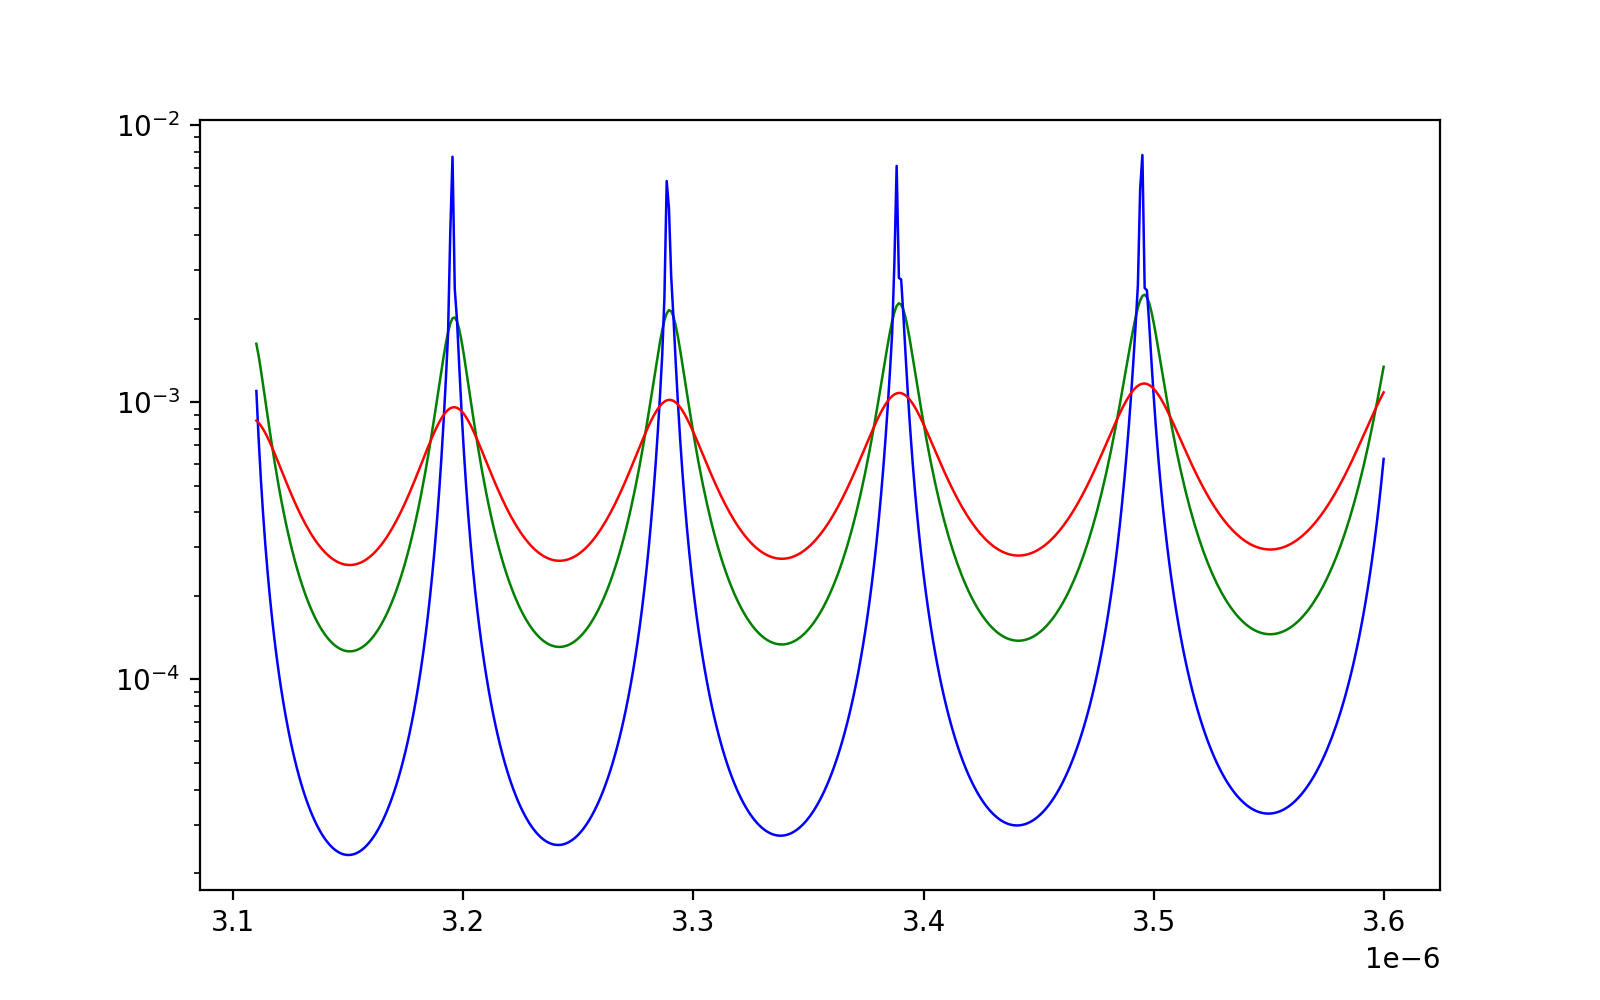

In [12]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas2.imag, color='green', linewidth=.9)
plt.plot(wls, -betas1.imag, color='blue', linewidth=.9)
plt.plot(wls, -betas3.imag, color='red', linewidth=.9)

plt.yscale('log')

# High Loss Polymer

In [13]:
# n = 300
# wls = np.linspace(3.11e-6, 3.6e-6,n+1)
betas4 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5 - .01j

In [3]:
ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, 15*2.7183333333333333e-6, 15*2e-6]
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly, lambda x:n_air]
mats = ['air','glass', 'polymer','air']
maxhs = [10,10,10,10]

In [14]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas4[i] = beta
    

     --------------------  1/501: wavelength: 3.11e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (30.300266407158972-0.0005711005135398316j) . Residual of determinant:  4.071172680406512e-11 


     --------------------  2/501: wavelength: 3.11098e-06  --------------------     

Scaled beta:  (30.290721313194474-0.0005694552229402464j) . Residual of determinant:  4.260021892435493e-11 


     --------------------  3/501: wavelength: 3.1119599999999998e-06  --------------------     

Scaled beta:  (30.281182000770045-0.0005671383732728475j) . Residual of determinant:  2.479459340469905e-11 


     --------------------  4/501: wavelength: 3.1129399999999997e-06  --------------------     

Scaled beta:  (30.271648400825267-0.00056418234004083j) . Residual of determinant:  7.210006369566254e-12 


     --------------------  5/501: wavelength: 3.11392e-06  --------------------     

Scaled beta:  (30.26212044966646-0.0005606263326269293j) . Residual of dete

Scaled beta:  (29.93209830296504-0.0003962069175838293j) . Residual of determinant:  3.714893915790311e-11 


     --------------------  41/501: wavelength: 3.1492e-06  --------------------     

Scaled beta:  (29.922770067564965-0.00039570074349307263j) . Residual of determinant:  7.743026825046731e-11 


     --------------------  42/501: wavelength: 3.15018e-06  --------------------     

Scaled beta:  (29.913447593958328-0.00039551605540818265j) . Residual of determinant:  3.330713998821196e-11 


     --------------------  43/501: wavelength: 3.1511599999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.904130890476935-0.0003956533831048907j) . Residual of determinant:  1.9954590523356966e-11 


     --------------------  44/501: wavelength: 3.1521399999999997e-06  --------------------     

Scaled beta:  (29.89481996537229-0.0003961132674459348j) . Residual of determinant:  2.293221833476471e-11 


     --------------------  45/501: wavelength: 3.15312e-06

Scaled beta:  (29.563579272044148-0.0005913943266193573j) . Residual of determinant:  6.873894690117851e-11 


     --------------------  81/501: wavelength: 3.1884e-06  --------------------     

Scaled beta:  (29.55449115254752-0.0005972448909973121j) . Residual of determinant:  5.528765411094154e-11 


     --------------------  82/501: wavelength: 3.1893799999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.545409115988434-0.0006025810407184631j) . Residual of determinant:  1.0909517764346038e-11 


     --------------------  83/501: wavelength: 3.1903599999999997e-06  --------------------     

Scaled beta:  (29.53633311355475-0.0006073494525741469j) . Residual of determinant:  2.218637869937476e-12 


     --------------------  84/501: wavelength: 3.1913399999999997e-06  --------------------     

Scaled beta:  (29.527263089388537-0.0006115011267752367j) . Residual of determinant:  2.4417896225416325e-11 


     --------------------  85/501: wavelength: 3

Scaled beta:  (29.177626587239956-0.00043687914779540774j) . Residual of determinant:  1.8856039668901814e-11 


     --------------------  124/501: wavelength: 3.23054e-06  --------------------     

Scaled beta:  (29.168762513145516-0.0004331758348391269j) . Residual of determinant:  4.034845924439343e-11 


     --------------------  125/501: wavelength: 3.23152e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.159903638135006-0.000429783778902457j) . Residual of determinant:  3.4596526870460014e-11 


     --------------------  126/501: wavelength: 3.2325e-06  --------------------     

Scaled beta:  (29.151049974523204-0.0004267045490054946j) . Residual of determinant:  6.485160219260167e-11 


     --------------------  127/501: wavelength: 3.23348e-06  --------------------     

Scaled beta:  (29.142201533819993-0.0004239392002105562j) . Residual of determinant:  4.5714480276664005e-12 


     --------------------  128/501: wavelength: 3.23446e-06  -------------

scaling guess: 1
Scaled beta:  (28.79265554188585-0.00056387699758857j) . Residual of determinant:  2.678278212599911e-11 


     --------------------  168/501: wavelength: 3.27366e-06  --------------------     

Scaled beta:  (28.78403038027171-0.0005720154782848467j) . Residual of determinant:  2.6505503682967643e-11 


     --------------------  169/501: wavelength: 3.2746399999999998e-06  --------------------     

Scaled beta:  (28.775410974552056-0.0005800860947570116j) . Residual of determinant:  1.7214491929818568e-11 


     --------------------  170/501: wavelength: 3.2756199999999997e-06  --------------------     

Scaled beta:  (28.766797328462086-0.0005880393761173331j) . Residual of determinant:  3.994188246705008e-11 


     --------------------  171/501: wavelength: 3.2765999999999997e-06  --------------------     

Scaled beta:  (28.758189441139635-0.0005958231264051144j) . Residual of determinant:  1.3765332884971835e-12 


     --------------------  172/501: waveleng

Scaled beta:  (28.434926701758858-0.0005150176247014319j) . Residual of determinant:  1.82596215227203e-11 


     --------------------  210/501: wavelength: 3.3148199999999997e-06  --------------------     

Scaled beta:  (28.426510285699862-0.0005079999860729404j) . Residual of determinant:  1.3273800303563927e-11 


     --------------------  211/501: wavelength: 3.3157999999999997e-06  --------------------     

Scaled beta:  (28.418098439859357-0.0005012003270928561j) . Residual of determinant:  1.583330177121249e-11 


     --------------------  212/501: wavelength: 3.31678e-06  --------------------     

Scaled beta:  (28.40969118419213-0.0004946349432089326j) . Residual of determinant:  2.297798340679009e-11 


     --------------------  213/501: wavelength: 3.31776e-06  --------------------     

Scaled beta:  (28.40128853829103-0.0004883177467489775j) . Residual of determinant:  3.209471769949754e-11 


     --------------------  214/501: wavelength: 3.31874e-06  ------------

Scaled beta:  (28.093747217500493-0.0004610499597156165j) . Residual of determinant:  2.419379756019679e-11 


     --------------------  251/501: wavelength: 3.355e-06  --------------------     

Scaled beta:  (28.085528111688216-0.00046602087365581885j) . Residual of determinant:  4.5743285012509825e-11 


     --------------------  252/501: wavelength: 3.35598e-06  --------------------     

Scaled beta:  (28.077314009174337-0.0004712893089151168j) . Residual of determinant:  3.558046846554784e-11 


     --------------------  253/501: wavelength: 3.35696e-06  --------------------     

Scaled beta:  (28.069104924374574-0.00047685201734023184j) . Residual of determinant:  1.9916459095096482e-11 


     --------------------  254/501: wavelength: 3.35794e-06  --------------------     

Scaled beta:  (28.06090087256928-0.0004827047336478164j) . Residual of determinant:  9.4581727493157e-12 


     --------------------  255/501: wavelength: 3.35892e-06  --------------------     

Scaled

Scaled beta:  (27.74496100272989-0.0006760982649350498j) . Residual of determinant:  2.366491356068094e-13 


     --------------------  294/501: wavelength: 3.39714e-06  --------------------     

Scaled beta:  (27.736957353304835-0.000671274797962759j) . Residual of determinant:  1.9923611025368206e-11 


     --------------------  295/501: wavelength: 3.39812e-06  --------------------     

Scaled beta:  (27.728957866484965-0.0006658966965523463j) . Residual of determinant:  2.3387890571339714e-11 


     --------------------  296/501: wavelength: 3.3990999999999998e-06  --------------------     

Scaled beta:  (27.720962500149966-0.000660013210905087j) . Residual of determinant:  1.602001848792425e-11 


     --------------------  297/501: wavelength: 3.4000799999999997e-06  --------------------     

Scaled beta:  (27.71297121845869-0.0006536759713259225j) . Residual of determinant:  3.186221706264372e-12 


     --------------------  298/501: wavelength: 3.4010599999999997e-06  -

Scaled beta:  (27.420181148225268-0.0004392215360569276j) . Residual of determinant:  1.9749573366402766e-11 


     --------------------  335/501: wavelength: 3.43732e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.412349141485564-0.0004379985158951425j) . Residual of determinant:  6.2658791259798284e-12 


     --------------------  336/501: wavelength: 3.4382999999999998e-06  --------------------     

Scaled beta:  (27.404521546379016-0.0004370608243537333j) . Residual of determinant:  6.472437924921591e-11 


     --------------------  337/501: wavelength: 3.4392799999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.396698368281392-0.00043640801421454767j) . Residual of determinant:  7.934537195355455e-11 


     --------------------  338/501: wavelength: 3.4402599999999997e-06  --------------------     

Scaled beta:  (27.38887961236287-0.0004360397695351674j) . Residual of determinant:  4.0389721204885163e-11 


     ------------------

Scaled beta:  (27.095117886814965-0.0006291555823469323j) . Residual of determinant:  5.705286514767815e-13 


     --------------------  377/501: wavelength: 3.4784799999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.08747877452391-0.0006382051522634969j) . Residual of determinant:  2.7819862921496413e-11 


     --------------------  378/501: wavelength: 3.47946e-06  --------------------     

Scaled beta:  (27.079844557170762-0.0006471879343789753j) . Residual of determinant:  7.710780173377113e-12 


     --------------------  379/501: wavelength: 3.48044e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.07221523987102-0.0006560590087793661j) . Residual of determinant:  4.977737296955547e-12 


     --------------------  380/501: wavelength: 3.48142e-06  --------------------     

Scaled beta:  (27.064590823947388-0.0006647709936330234j) . Residual of determinant:  2.333616701237049e-11 


     --------------------  381/501: wavelength: 3

scaling guess: 1
Scaled beta:  (26.79305336915802-0.000622057841163984j) . Residual of determinant:  6.208244184882703e-11 


     --------------------  417/501: wavelength: 3.5176799999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.78558185000556-0.000613602712313632j) . Residual of determinant:  8.588646190799212e-12 


     --------------------  418/501: wavelength: 3.5186599999999996e-06  --------------------     

Scaled beta:  (26.778113967047332-0.0006052270468072063j) . Residual of determinant:  2.4149878221265178e-11 


     --------------------  419/501: wavelength: 3.51964e-06  --------------------     

Scaled beta:  (26.770649737013233-0.0005969600557749865j) . Residual of determinant:  1.5727714188401295e-11 


     --------------------  420/501: wavelength: 3.52062e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.763189177669705-0.0005888280663190584j) . Residual of determinant:  1.0538692631936294e-11 


     ----------------

Scaled beta:  (26.50450142796226-0.0004637376221274278j) . Residual of determinant:  2.236709136415766e-11 


     --------------------  456/501: wavelength: 3.5558999999999997e-06  --------------------     

Scaled beta:  (26.49718202465502-0.00046517187881304855j) . Residual of determinant:  5.178629493783023e-11 


     --------------------  457/501: wavelength: 3.55688e-06  --------------------     

Scaled beta:  (26.489866675281988-0.0004668876121917244j) . Residual of determinant:  1.1966877137299532e-11 


     --------------------  458/501: wavelength: 3.55786e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.482555384687707-0.0004688860173117206j) . Residual of determinant:  3.134816249103267e-11 


     --------------------  459/501: wavelength: 3.55884e-06  --------------------     

Scaled beta:  (26.47524815797555-0.00047116842763672865j) . Residual of determinant:  8.273479187513038e-12 


     --------------------  460/501: wavelength: 3.55982e-06  ----

scaling guess: 1
scaling guess: 2
Scaled beta:  (26.207833925570323-0.0007392596742201405j) . Residual of determinant:  1.0817534232334074e-11 


     --------------------  497/501: wavelength: 3.5960799999999996e-06  --------------------     

Scaled beta:  (26.200689989208165-0.0007483128777814209j) . Residual of determinant:  3.150951394027201e-12 


     --------------------  498/501: wavelength: 3.5970599999999996e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.193550569042138-0.0007570380087737513j) . Residual of determinant:  2.6267306328915174e-11 


     --------------------  499/501: wavelength: 3.59804e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.186415647608865-0.0007653815330873455j) . Residual of determinant:  8.44940409806932e-12 


     --------------------  500/501: wavelength: 3.59902e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.17928520187022-0.0007732899044106808j) . Residual of determinant:  2.280115292

<IPython.core.display.Javascript object>


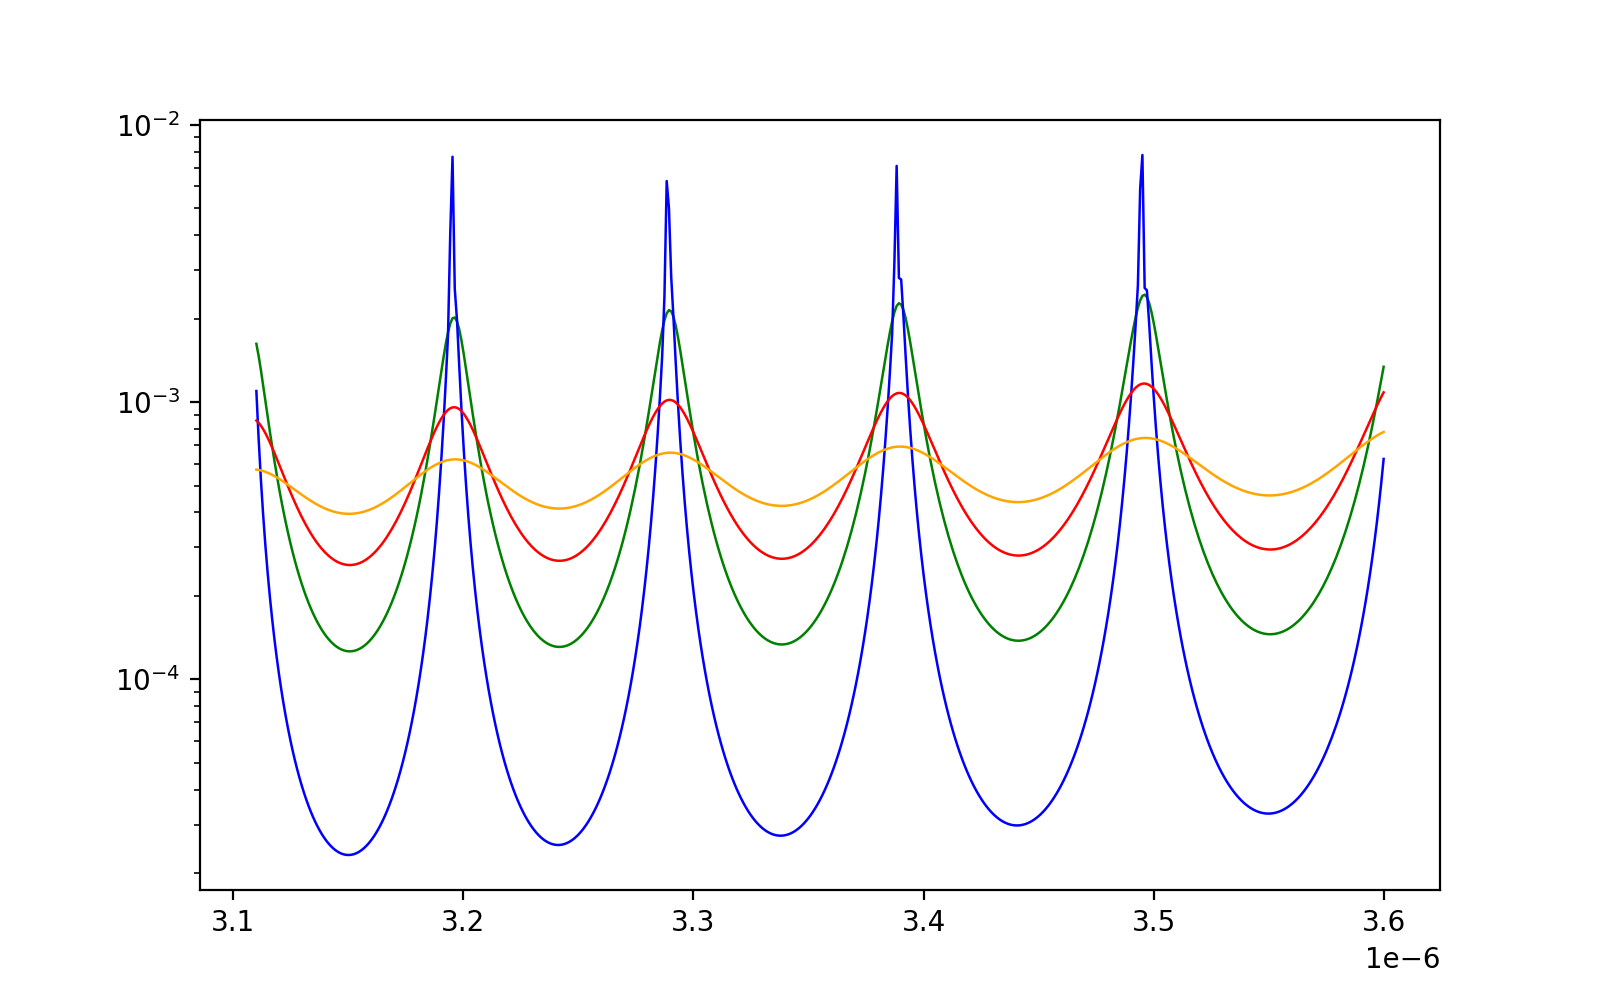

In [15]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas2.imag, color='green', linewidth=.9)
plt.plot(wls, -betas1.imag, color='blue', linewidth=.9)
plt.plot(wls, -betas3.imag, color='red', linewidth=.9)
plt.plot(wls, -betas4.imag, color='orange', linewidth=.9)

plt.yscale('log')

# Highest loss polymer


In [67]:
# n = 300
# wls = np.linspace(3.11e-6, 3.6e-6,n+1)
betas5 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5 - .018j

In [68]:
ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, 15*2.7183333333333333e-6, 15*2e-6]
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly, lambda x:n_air]
mats = ['air','glass', 'polymer','air']
maxhs = [10,10,10,10]

In [69]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas5[i] = beta
    

     --------------------  1/501: wavelength: 3.11e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (30.300246789319935-0.0004843146114771493j) . Residual of determinant:  2.403367176093623e-10 


     --------------------  2/501: wavelength: 3.11098e-06  --------------------     

Scaled beta:  (30.290694879440334-0.00048452409650483116j) . Residual of determinant:  2.9291788932919976e-10 


     --------------------  3/501: wavelength: 3.1119599999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (30.28114896745484-0.00048464839970068245j) . Residual of determinant:  1.1799850383699596e-10 


     --------------------  4/501: wavelength: 3.1129399999999997e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (30.271609041293395-0.0004846891489260058j) . Residual of determinant:  1.3089748182420705e-10 


     --------------------  5/501: wavelength: 3.11392

Scaled beta:  (29.950749245317024-0.00046792823711580214j) . Residual of determinant:  1.9602751343591943e-10 


     --------------------  39/501: wavelength: 3.14724e-06  --------------------     

Scaled beta:  (29.941413941606164-0.0004679443412019714j) . Residual of determinant:  5.6304240303703324e-11 


     --------------------  40/501: wavelength: 3.14822e-06  --------------------     

Scaled beta:  (29.93208442367618-0.0004680340903665455j) . Residual of determinant:  2.1100624357950406e-10 


     --------------------  41/501: wavelength: 3.1492e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (29.92276069100932-0.00046819887160853737j) . Residual of determinant:  8.334244073218509e-11 


     --------------------  42/501: wavelength: 3.15018e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (29.913442743159777-0.00046843977266469825j) . Residual of determinant:  4.199994865411485e-10 


     ----

scaling guess: 1
scaling guess: 2
Scaled beta:  (29.60006832694764-0.0005101628267175383j) . Residual of determinant:  4.205788259817623e-10 


     --------------------  77/501: wavelength: 3.18448e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.590951962914666-0.00051152752851973j) . Residual of determinant:  3.2174662594319866e-12 


     --------------------  78/501: wavelength: 3.18546e-06  --------------------     

Scaled beta:  (29.58184127916023-0.000512833762853933j) . Residual of determinant:  4.737093951996379e-11 


     --------------------  79/501: wavelength: 3.18644e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (29.572736266523595-0.0005140761965793728j) . Residual of determinant:  1.9518842188111386e-10 


     --------------------  80/501: wavelength: 3.18742e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (29.56363691542764-0.0005152497774288398j) .

scaling guess: 1
Scaled beta:  (29.27538061244686-0.0005093008150338665j) . Residual of determinant:  1.0127541664136579e-10 


     --------------------  113/501: wavelength: 3.21976e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.266462040331678-0.0005082481076343472j) . Residual of determinant:  3.477045070128088e-11 


     --------------------  114/501: wavelength: 3.2207399999999998e-06  --------------------     

Scaled beta:  (29.257548804750115-0.000507201559551123j) . Residual of determinant:  2.171135294936847e-10 


     --------------------  115/501: wavelength: 3.2217199999999997e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (29.248640901872708-0.0005061669417367492j) . Residual of determinant:  1.7429045270278216e-10 


     --------------------  116/501: wavelength: 3.2226999999999997e-06  --------------------     

Scaled beta:  (29.239738328238296-0.0005051498765026445j) . Residual of determinant:  3.879308262241669

scaling guess: 5
Scaled beta:  (28.940212209823667-0.0005057657704921336j) . Residual of determinant:  1.5676808771796357e-10 


     --------------------  151/501: wavelength: 3.257e-06  --------------------     

scaling guess: 1
Scaled beta:  (28.931495532606974-0.0005070318885389514j) . Residual of determinant:  3.51219915871927e-11 


     --------------------  152/501: wavelength: 3.25798e-06  --------------------     

Scaled beta:  (28.92278416155573-0.0005083512369238486j) . Residual of determinant:  5.011186400645552e-10 


     --------------------  153/501: wavelength: 3.25896e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (28.914078095519578-0.0005097198332062242j) . Residual of determinant:  2.7694619043729006e-10 


     --------------------  154/501: wavelength: 3.2599399999999997e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (28.9053773

Scaled beta:  (28.62119964041413-0.000548264130383216j) . Residual of determinant:  3.852629413569941e-10 


     --------------------  188/501: wavelength: 3.29326e-06  --------------------     

scaling guess: 1
Scaled beta:  (28.612676017201075-0.0005481728860230441j) . Residual of determinant:  8.913115143656109e-11 


     --------------------  189/501: wavelength: 3.29424e-06  --------------------     

Scaled beta:  (28.604157441278105-0.0005479850480131971j) . Residual of determinant:  1.5206735700526598e-10 


     --------------------  190/501: wavelength: 3.29522e-06  --------------------     

scaling guess: 1
Scaled beta:  (28.595643901575826-0.0005477024266282245j) . Residual of determinant:  1.1932693166274407e-11 


     --------------------  191/501: wavelength: 3.2962e-06  --------------------     

scaling guess: 1
Scaled beta:  (28.58713538720182-0.000547327303169999j) . Residual of determinant:  5.2197537203345265e-11 


     --------------------  192/501: waveleng

Scaled beta:  (28.300780469240966-0.0005130813203568825j) . Residual of determinant:  1.0377378380998968e-10 


     --------------------  226/501: wavelength: 3.3304999999999997e-06  --------------------     

Scaled beta:  (28.29244364941428-0.0005125161299669121j) . Residual of determinant:  2.0347396370469221e-10 


     --------------------  227/501: wavelength: 3.3314799999999997e-06  --------------------     

Scaled beta:  (28.284111688380122-0.0005120243612865359j) . Residual of determinant:  1.172265113547576e-10 


     --------------------  228/501: wavelength: 3.33246e-06  --------------------     

Scaled beta:  (28.275784586164686-0.0005116080809217982j) . Residual of determinant:  2.186494133166477e-10 


     --------------------  229/501: wavelength: 3.33344e-06  --------------------     

Scaled beta:  (28.267462342873056-0.0005112691156995978j) . Residual of determinant:  3.1196963644373606e-10 


     --------------------  230/501: wavelength: 3.33442e-06  --------

Scaled beta:  (27.97109877342631-0.0005466606538857203j) . Residual of determinant:  1.3313651581951206e-10 


     --------------------  266/501: wavelength: 3.3696999999999997e-06  --------------------     

Scaled beta:  (27.962956227534132-0.000548339781518407j) . Residual of determinant:  9.894904969101358e-11 


     --------------------  267/501: wavelength: 3.37068e-06  --------------------     

Scaled beta:  (27.95481850468832-0.0005499982019621065j) . Residual of determinant:  1.70005126714416e-10 


     --------------------  268/501: wavelength: 3.37166e-06  --------------------     

Scaled beta:  (27.946685599746907-0.0005516301037604982j) . Residual of determinant:  1.6441920399800127e-10 


     --------------------  269/501: wavelength: 3.37264e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.938557507183877-0.000553229697533774j) . Residual of determinant:  1.1839223000369e-10 


     --------------------  270/501: wavelength: 3.37362e-06  ---------

scaling guess: 1
Scaled beta:  (27.649079935364494-0.0005598389031735376j) . Residual of determinant:  1.7820434477688957e-11 


     --------------------  306/501: wavelength: 3.4088999999999997e-06  --------------------     

Scaled beta:  (27.64112371804023-0.0005586196579097086j) . Residual of determinant:  2.0793413719287143e-10 


     --------------------  307/501: wavelength: 3.4098799999999996e-06  --------------------     

Scaled beta:  (27.63317198129604-0.0005573694167145237j) . Residual of determinant:  1.5552686685427e-10 


     --------------------  308/501: wavelength: 3.41086e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (27.62522471987645-0.0005560938686015787j) . Residual of determinant:  1.171078763291076e-11 


     --------------------  309/501: wavelength: 3.41184e-06  --------------------     

Scaled beta:  (27.617281928902713-0.0005547987127458709j) . Residu

Scaled beta:  (27.349870831968612-0.0005320438344183693j) . Residual of determinant:  2.6140943536728e-11 


     --------------------  344/501: wavelength: 3.4461399999999998e-06  --------------------     

Scaled beta:  (27.342083437347036-0.0005326192016916649j) . Residual of determinant:  1.1777637548166672e-10 


     --------------------  345/501: wavelength: 3.4471199999999997e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (27.33430048278594-0.0005332787450268527j) . Residual of determinant:  1.2330183031740607e-11 


     --------------------  346/501: wavelength: 3.4481e-06  --------------------     

Scaled beta:  (27.32652196885706-0.0005340216809915031j) . Residual of determinant:  1.0726183315340446e-11 


     --------------------  347/501: wavelength: 3.44908e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.318747896109816-0.0005348470239558485j) . Residual of determinant:  1.0616544463400729e-10 


     ----------------

Scaled beta:  (27.04183576732752-0.0005947686396177161j) . Residual of determinant:  9.361253074523852e-12 


     --------------------  384/501: wavelength: 3.4853399999999997e-06  --------------------     

Scaled beta:  (27.03422530385699-0.0005962182681498919j) . Residual of determinant:  1.0508235959489377e-10 


     --------------------  385/501: wavelength: 3.4863199999999997e-06  --------------------     

Scaled beta:  (27.026619184422604-0.0005975909883734865j) . Residual of determinant:  4.9891040398965056e-11 


     --------------------  386/501: wavelength: 3.4872999999999996e-06  --------------------     

Scaled beta:  (27.019017400751995-0.0005988825302843404j) . Residual of determinant:  3.313050106344675e-11 


     --------------------  387/501: wavelength: 3.48828e-06  --------------------     

Scaled beta:  (27.011419944275413-0.0006000889182634135j) . Residual of determinant:  6.012400857331402e-12 


     --------------------  388/501: wavelength: 3.48926e-06 

scaling guess: 2
Scaled beta:  (26.755614067006984-0.0005874312073076216j) . Residual of determinant:  1.2246467383748332e-11 


     --------------------  422/501: wavelength: 3.52258e-06  --------------------     

Scaled beta:  (26.74816238510758-0.0005860736063858421j) . Residual of determinant:  1.254974684467672e-10 


     --------------------  423/501: wavelength: 3.5235599999999998e-06  --------------------     

Scaled beta:  (26.740714749797522-0.0005847181350410875j) . Residual of determinant:  1.384794644275701e-10 


     --------------------  424/501: wavelength: 3.5245399999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.73327115835643-0.0005833701020569128j) . Residual of determinant:  1.246971730937507e-10 


     --------------------  425/501: wavelength: 3.5255199999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.725831608350372-0.0005820347049513304j) . Residual of determinant:  1.8475034812227607e-11 


     ----

scaling guess: 2
Scaled beta:  (26.460694035953225-0.000572567025221353j) . Residual of determinant:  3.3558861197186436e-11 


     --------------------  462/501: wavelength: 3.56178e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (26.453403805349765-0.0005738000515659732j) . Residual of determinant:  2.9476828354327955e-11 


     --------------------  463/501: wavelength: 3.5627599999999997e-06  --------------------     

Scaled beta:  (26.446117622547778-0.0005751144304209843j) . Residual of determinant:  1.0452517881406674e-10 


     --------------------  464/501: wavelength: 3.5637399999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.438835488305124-0.000576508426238366j) . Residual of determinant:  5.081436873884682e-11 


     --------------------  465/501: wavelength: 3.5647199999999996e-06  --------------------     

Scaled beta:  (26.431557403333105-0.0005779801129780781j) . Residual of determinant:  1.66752865078435

scaling guess: 1
scaling guess: 2
Scaled beta:  (26.17937165912256-0.000649937824223742j) . Residual of determinant:  4.8207974196521383e-11 


     --------------------  501/501: wavelength: 3.6e-06  --------------------     

Scaled beta:  (26.172238558507676-0.000651483962888246j) . Residual of determinant:  1.975526077687933e-11 




<IPython.core.display.Javascript object>


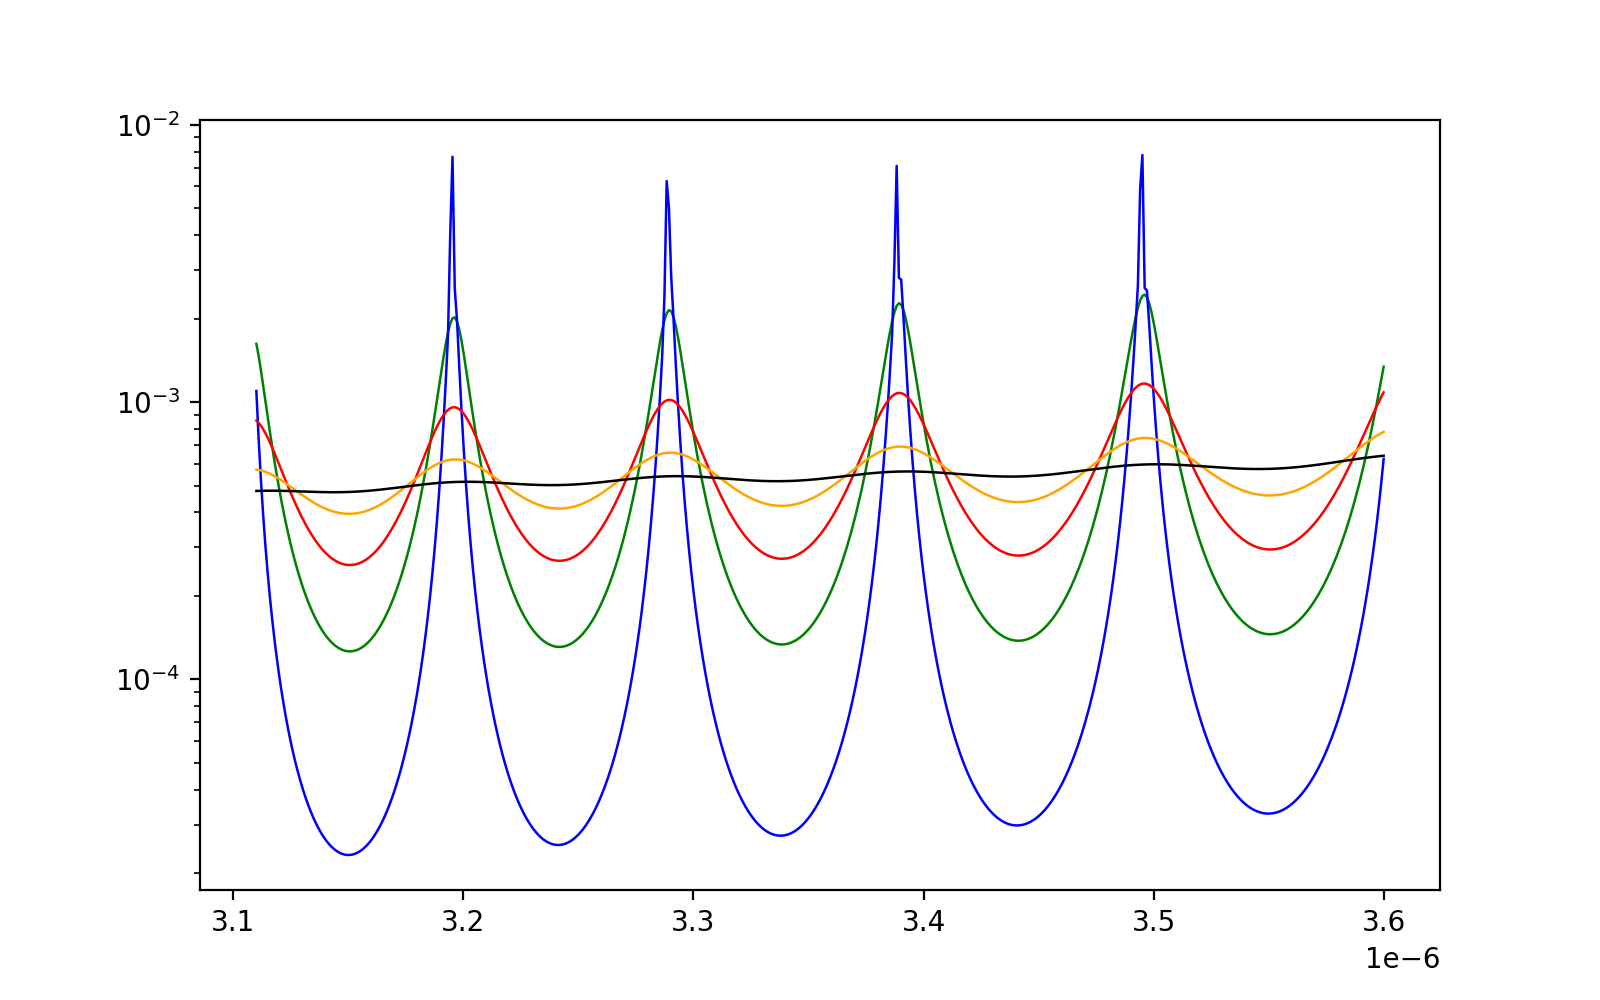

In [54]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas2.imag, color='green', linewidth=.9)
plt.plot(wls, -betas1.imag, color='blue', linewidth=.9)
plt.plot(wls, -betas3.imag, color='red', linewidth=.9)
plt.plot(wls, -betas4.imag, color='orange', linewidth=.9)
plt.plot(wls, -betas5.imag, color='black', linewidth=.9)

plt.yscale('log')

# N0 on this wl range


In [58]:
n = 500
wls = np.linspace(3.11e-6, 3.6e-6, n+1)
betasN0 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814


In [59]:
ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, ]
ns = [lambda x:n_air, lambda x:n_glass]
mats = ['air','glass']
maxhs = [10,10,]

In [60]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betasN0[i] = beta
    

     --------------------  1/501: wavelength: 3.11e-06  --------------------     

Scaled beta:  (30.30025392138752-0.0004649229158857267j) . Residual of determinant:  1.950811915234251e-14 


     --------------------  2/501: wavelength: 3.11098e-06  --------------------     

Scaled beta:  (30.290700818966503-0.0004652159059698921j) . Residual of determinant:  2.1136210273553302e-14 


     --------------------  3/501: wavelength: 3.1119599999999998e-06  --------------------     

Scaled beta:  (30.281153730809727-0.0004655089882851964j) . Residual of determinant:  2.1663199003097905e-14 


     --------------------  4/501: wavelength: 3.1129399999999997e-06  --------------------     

Scaled beta:  (30.27161265123705-0.0004658021628315682j) . Residual of determinant:  3.1176487387389554e-14 


     --------------------  5/501: wavelength: 3.11392e-06  --------------------     

Scaled beta:  (30.262077574575493-0.0004660954296089224j) . Residual of determinant:  4.995848859638083e-1

Scaled beta:  (29.913448584388373-0.0004770111380563455j) . Residual of determinant:  1.60702442353251e-14 


     --------------------  43/501: wavelength: 3.1511599999999997e-06  --------------------     

Scaled beta:  (29.90413748419376-0.00047730790955461376j) . Residual of determinant:  2.7294292105527804e-14 


     --------------------  44/501: wavelength: 3.1521399999999997e-06  --------------------     

Scaled beta:  (29.894832171123593-0.0004776047732805403j) . Residual of determinant:  5.606575845310883e-14 


     --------------------  45/501: wavelength: 3.15312e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (29.88553263978191-0.00047790172923454653j) . Residual of determinant:  1.6989861620466796e-14 


     --------------------  46/501: wavelength: 3.1541e-06  --------------------     

Scaled beta:  (29.876238884779458-0.0004781987774163799j) . Residual of determinant:  3.878529123017432e-15 


     --------------------  47/501: wavele

Scaled beta:  (29.536382068914385-0.0004892543956022649j) . Residual of determinant:  1.2650290066514994e-13 


     --------------------  84/501: wavelength: 3.1913399999999997e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (29.527303886580707-0.0004895549483841931j) . Residual of determinant:  7.809623894704801e-14 


     --------------------  85/501: wavelength: 3.19232e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.51823127552704-0.0004898555933908945j) . Residual of determinant:  7.075359547240753e-14 


     --------------------  86/501: wavelength: 3.1933e-06  --------------------     

Scaled beta:  (29.509164230624027-0.0004901563306223227j) . Residual of determinant:  2.2362614039620083e-14 


     --------------------  87/501: wavelength: 3.19428e-06  --------------------     

Scaled beta:  (29.500102746748613-0.0004904571600784308j) . Residual of determinant:  1.7642356087608328e-13 


     --------------------  88/501:

Scaled beta:  (29.177550265030103-0.0005013484414398116j) . Residual of determinant:  1.94874255993647e-15 


     --------------------  124/501: wavelength: 3.23054e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.16869099432859-0.0005016526831519656j) . Residual of determinant:  4.2947190931341495e-14 


     --------------------  125/501: wavelength: 3.23152e-06  --------------------     

scaling guess: 1
Scaled beta:  (29.15983709454938-0.0005019570170857526j) . Residual of determinant:  3.7213619239759756e-14 


     --------------------  126/501: wavelength: 3.2325e-06  --------------------     

Scaled beta:  (29.150988560807562-0.000502261443241088j) . Residual of determinant:  1.6939433518468885e-13 


     --------------------  127/501: wavelength: 3.23348e-06  --------------------     

Scaled beta:  (29.142145388224158-0.0005025659616178992j) . Residual of determinant:  2.3725664837091433e-14 


     --------------------  128/501: wavelength: 3.23446e-06 

scaling guess: 1
Scaled beta:  (28.827321028797297-0.0005135900420100898j) . Residual of determinant:  3.6055891602145816e-14 


     --------------------  164/501: wavelength: 3.26974e-06  --------------------     

Scaled beta:  (28.81867284245599-0.0005138979725251401j) . Residual of determinant:  7.419125303228504e-14 


     --------------------  165/501: wavelength: 3.27072e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (28.810029836172472-0.0005142059952586625j) . Residual of determinant:  6.58374967773018e-14 


     --------------------  166/501: wavelength: 3.2717e-06  --------------------     

scaling guess: 1
Scaled beta:  (28.801392005291888-0.0005145141102105138j) . Residual of determinant:  3.873621239853495e-14 


     --------------------  167/501: wavelength: 3.27268e-06  --------------------     

Scaled beta:  (28.792759345164914-0.0005148223173806375j) . Residual of determinant:  1.0782878460234776e-14 


     -------------------- 

Scaled beta:  (28.476943973718672-0.0005262908113765041j) . Residual of determinant:  8.481263666599654e-14 


     --------------------  205/501: wavelength: 3.30992e-06  --------------------     

Scaled beta:  (28.46850441135415-0.0005266025227806872j) . Residual of determinant:  2.5695088486370277e-14 


     --------------------  206/501: wavelength: 3.3109e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (28.460069842682223-0.0005269143263999575j) . Residual of determinant:  1.066357255703315e-13 


     --------------------  207/501: wavelength: 3.31188e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (28.451640263269912-0.0005272262222342514j) . Residual of determinant:  1.188389027377292e-13 


     --------------------  208/501: wavelength: 3.31286e-06  --------------------     

Scaled beta:  (28.443215668689522-0.000527538210283497j) . Residual of determinant:  1

Scaled beta:  (28.134970014799443-0.0005391465944542252j) . Residual of determinant:  1.1869772591677797e-14 


     --------------------  246/501: wavelength: 3.3501e-06  --------------------     

scaling guess: 1
Scaled beta:  (28.126731613945065-0.0005394620866101064j) . Residual of determinant:  6.242986993945564e-14 


     --------------------  247/501: wavelength: 3.35108e-06  --------------------     

scaling guess: 1
Scaled beta:  (28.11849802925186-0.0005397776709777166j) . Residual of determinant:  9.739346400394784e-14 


     --------------------  248/501: wavelength: 3.35206e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (28.11026925649572-0.0005400933475569474j) . Residual of determinant:  4.2924098678344265e-14 


     --------------------  249/501: wavelength: 3.3530399999999997e-06  --------------------     

Scaled beta:  (28.102045291457458-0.0005404091163477464j) . Residual of determinant:  4.441434166503682e-16 


     ----------

Scaled beta:  (27.801100297629326-0.0005521573855726248j) . Residual of determinant:  1.2047773290575478e-13 


     --------------------  287/501: wavelength: 3.39028e-06  --------------------     

Scaled beta:  (27.793055947530878-0.0005524766583409352j) . Residual of determinant:  5.0663014047525924e-14 


     --------------------  288/501: wavelength: 3.3912599999999998e-06  --------------------     

Scaled beta:  (27.785016244378717-0.0005527960233175487j) . Residual of determinant:  4.3704511846830984e-15 


     --------------------  289/501: wavelength: 3.3922399999999997e-06  --------------------     

Scaled beta:  (27.77698118414542-0.0005531154805023852j) . Residual of determinant:  4.542124319721076e-15 


     --------------------  290/501: wavelength: 3.3932199999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.76895076280822-0.0005534350298953571j) . Residual of determinant:  7.212568726050501e-14 


     --------------------  291/501: wavele

scaling guess: 1
scaling guess: 2
Scaled beta:  (27.482911541668567-0.0005650002179499975j) . Residual of determinant:  2.401541533198356e-14 


     --------------------  327/501: wavelength: 3.42948e-06  --------------------     

Scaled beta:  (27.47504997339212-0.0005653231789846934j) . Residual of determinant:  1.1071321924767821e-13 


     --------------------  328/501: wavelength: 3.4304599999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (27.467192894528704-0.0005656462322243122j) . Residual of determinant:  2.047780571271511e-14 


     --------------------  329/501: wavelength: 3.4314399999999997e-06  --------------------     

Scaled beta:  (27.4593403012319-0.0005659693776687735j) . Residual of determinant:  3.0786991193423885e-14 


     --------------------  330/501: wavelength: 3.43242e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.451492189659643-0.0005662926153179889j) . Residual of determinant:  6.4413295979

scaling guess: 2
Scaled beta:  (27.16422799814048-0.0005783172275002819j) . Residual of determinant:  7.876850962447015e-14 


     --------------------  368/501: wavelength: 3.4696599999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (27.15654738791476-0.0005786439688667624j) . Residual of determinant:  3.468623538217318e-14 


     --------------------  369/501: wavelength: 3.4706399999999997e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (27.148871112934213-0.0005789708024347169j) . Residual of determinant:  3.8240217587919133e-14 


     --------------------  370/501: wavelength: 3.4716199999999996e-06  --------------------     

Scaled beta:  (27.141199169527464-0.0005792977282039711j) . Residual of determinant:  1.0227420637181283e-14 


     --------------------  371/501: wavelength: 3.4726e-06  --------------------     

Scaled beta:  (27.1335315540273-0.0005796247461744723j) . Residual of determinant:  2.0

scaling guess: 1
Scaled beta:  (26.852839158518506-0.0005917892277647849j) . Residual of determinant:  6.117002406478892e-14 


     --------------------  409/501: wavelength: 3.5098399999999997e-06  --------------------     

Scaled beta:  (26.845333326418228-0.0005921197493182815j) . Residual of determinant:  6.849857188421703e-15 


     --------------------  410/501: wavelength: 3.51082e-06  --------------------     

Scaled beta:  (26.837831682374127-0.0005924503630696344j) . Residual of determinant:  2.725973571101424e-14 


     --------------------  411/501: wavelength: 3.5118e-06  --------------------     

scaling guess: 1
Scaled beta:  (26.830334222880065-0.0005927810690187567j) . Residual of determinant:  2.7428654173001086e-14 


     --------------------  412/501: wavelength: 3.51278e-06  --------------------     

Scaled beta:  (26.822840944433835-0.0005931118671655636j) . Residual of determinant:  1.0769101004044534e-13 


     --------------------  413/501: wavelength:

Scaled beta:  (26.555838271701408-0.0006050820033681548j) . Residual of determinant:  2.2025724901305216e-14 


     --------------------  449/501: wavelength: 3.5490399999999997e-06  --------------------     

Scaled beta:  (26.548497265224448-0.0006054162127675336j) . Residual of determinant:  1.6621805900312524e-14 


     --------------------  450/501: wavelength: 3.55002e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (26.541160309556886-0.0006057505143612824j) . Residual of determinant:  3.2791853994000554e-14 


     --------------------  451/501: wavelength: 3.551e-06  --------------------     

Scaled beta:  (26.53382740134493-0.0006060849081492925j) . Residual of determinant:  7.068990442953309e-14 


     --------------------  452/501: wavelength: 3.55198e-06  --------------------     

Scaled beta:  (26.526498537238467-0.0006064193941314751j) . Residual of determinant:  7.999954610731937e-14 


     --------------------  453/501: wavelength: 

Scaled beta:  (26.265324843329456-0.0006185222900563429j) . Residual of determinant:  6.80713353498854e-14 


     --------------------  489/501: wavelength: 3.58824e-06  --------------------     

Scaled beta:  (26.258143289371002-0.0006188601871603075j) . Residual of determinant:  2.3933451215169892e-14 


     --------------------  490/501: wavelength: 3.58922e-06  --------------------     

Scaled beta:  (26.250965654907223-0.0006191981764549684j) . Residual of determinant:  3.4091758141575247e-14 


     --------------------  491/501: wavelength: 3.5902e-06  --------------------     

Scaled beta:  (26.243791936728464-0.0006195362579403584j) . Residual of determinant:  3.8054282976220487e-14 


     --------------------  492/501: wavelength: 3.59118e-06  --------------------     

Scaled beta:  (26.236622131628582-0.0006198744316163598j) . Residual of determinant:  1.0822998730096114e-13 


     --------------------  493/501: wavelength: 3.59216e-06  --------------------     

Sca

<IPython.core.display.Javascript object>


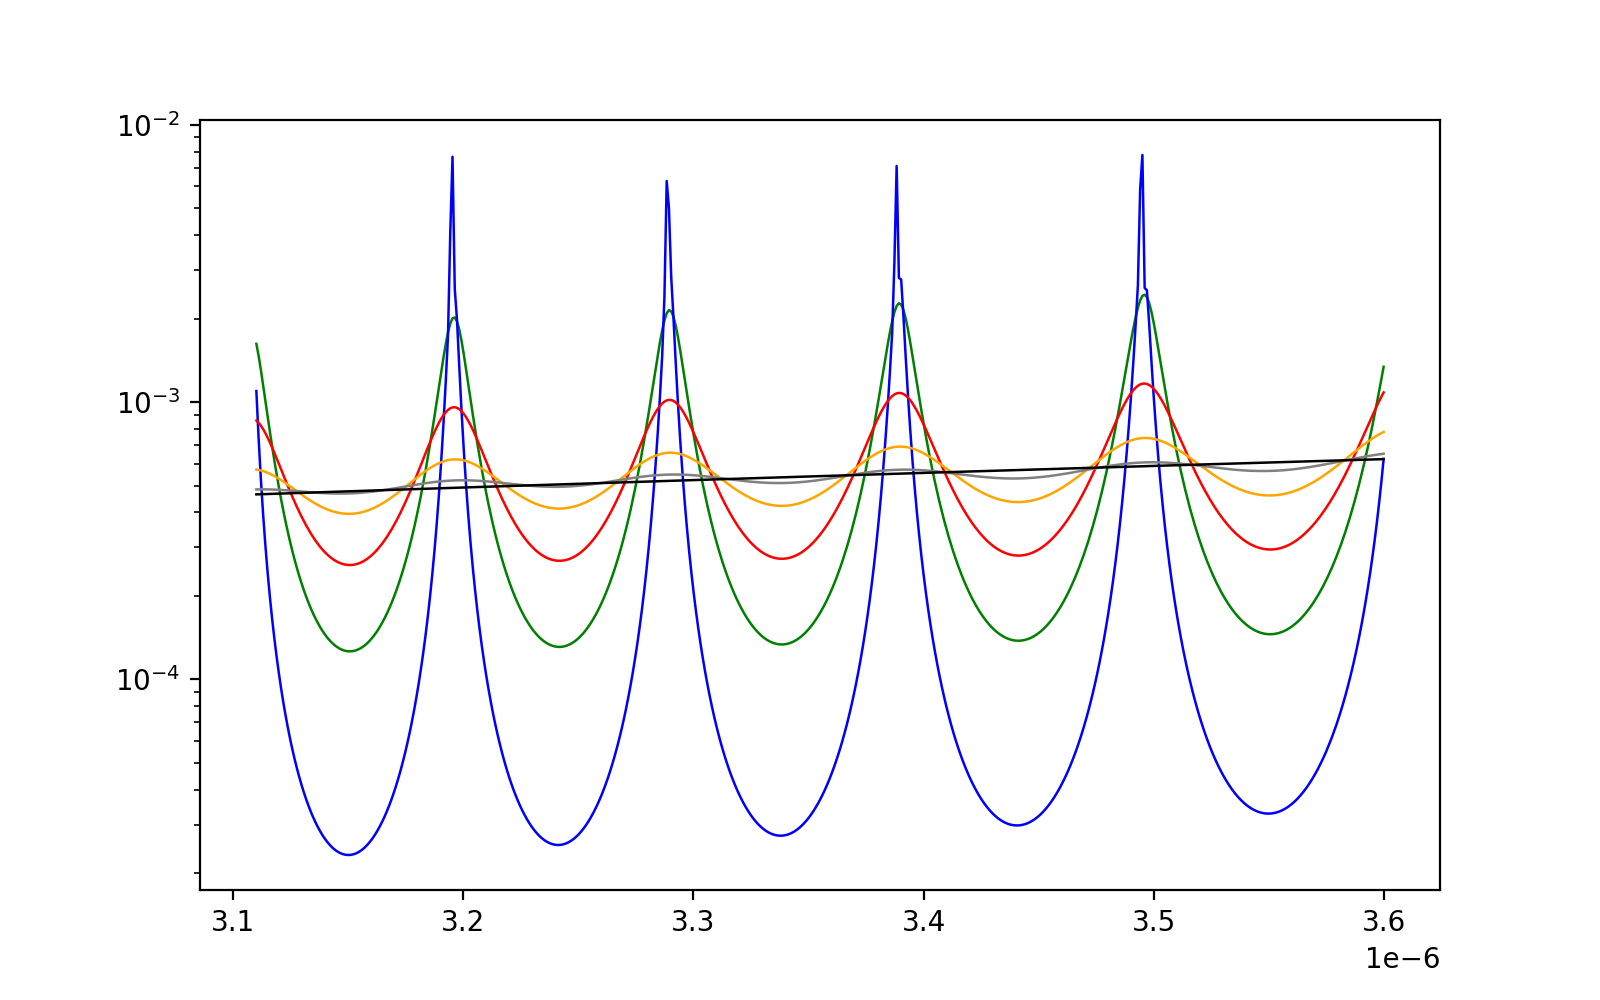

In [70]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas2.imag, color='green', linewidth=.9)
plt.plot(wls, -betas1.imag, color='blue', linewidth=.9)
plt.plot(wls, -betas3.imag, color='red', linewidth=.9)
plt.plot(wls, -betas4.imag, color='orange', linewidth=.9)
plt.plot(wls, -betas5.imag, color='gray', linewidth=.9)
plt.plot(wls, -betasN0.imag, color='black', linewidth=.9)

plt.yscale('log')

In [88]:
np.save('data/k_0', -betas1.imag)
np.save('data/k_0.002', -betas2.imag)
np.save('data/k_0.005', -betas3.imag)
np.save('data/k_0.01', -betas4.imag)
np.save('data/k_0.018', -betas5.imag)
np.save('data/k_inf', -betasN0.imag)

# Comparison Graph

In [73]:
import numpy as np
import matplotlib.pyplot as plt

n = 500
wls = np.linspace(3.11e-6, 3.6e-6, n+1)

B1 = np.load('data/no_loss_betas.npy')
B2 = np.load('data/low_loss_betas.npy')
B3 = np.load('data/med_loss_betas.npy')
B4 = np.load('data/high_loss_betas.npy')
B5 = np.load('data/highest_loss_betas.npy')

<IPython.core.display.Javascript object>


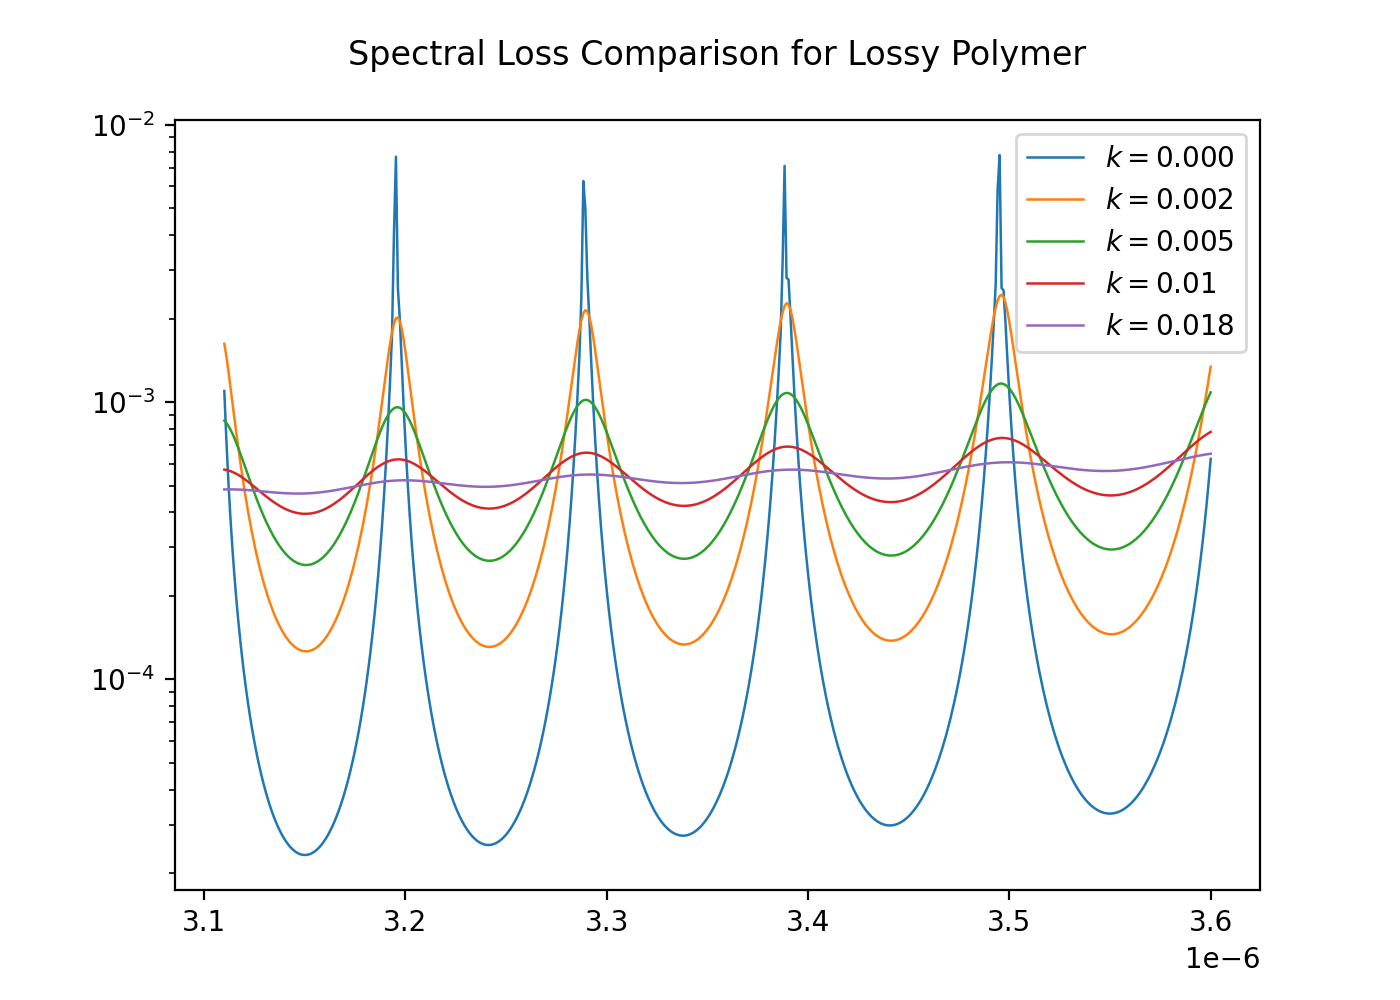

In [76]:
plt.figure(figsize=(7,5))
plt.plot(wls, B1, label='$k = 0.000$', linewidth=.9)
plt.plot(wls, B2, label='$k=0.002$', linewidth=.9)
plt.plot(wls, B3, label='$k=0.005$', linewidth=.9)
plt.plot(wls, B4, label='$k=0.01$', linewidth=.9)
plt.plot(wls, B5, label='$k=0.018$', linewidth=.9)
plt.legend()
plt.title("Spectral Loss Comparison for Lossy Polymer\n")
plt.yscale('log')

In [77]:
b1 = 20 / np.log(10) * np.load('data/no_loss_betas.npy')/A.scale
b2 = 20 / np.log(10) * np.load('data/low_loss_betas.npy')/A.scale
b3 = 20 / np.log(10) * np.load('data/med_loss_betas.npy')/A.scale
b4 = 20 / np.log(10) * np.load('data/high_loss_betas.npy')/A.scale
b5 = 20 / np.log(10) * np.load('data/highest_loss_betas.npy')/A.scale

In [78]:
n0 = np.load('data/N0.npy')

N0 = 20/np.log(10)*n0/A.scale

<IPython.core.display.Javascript object>


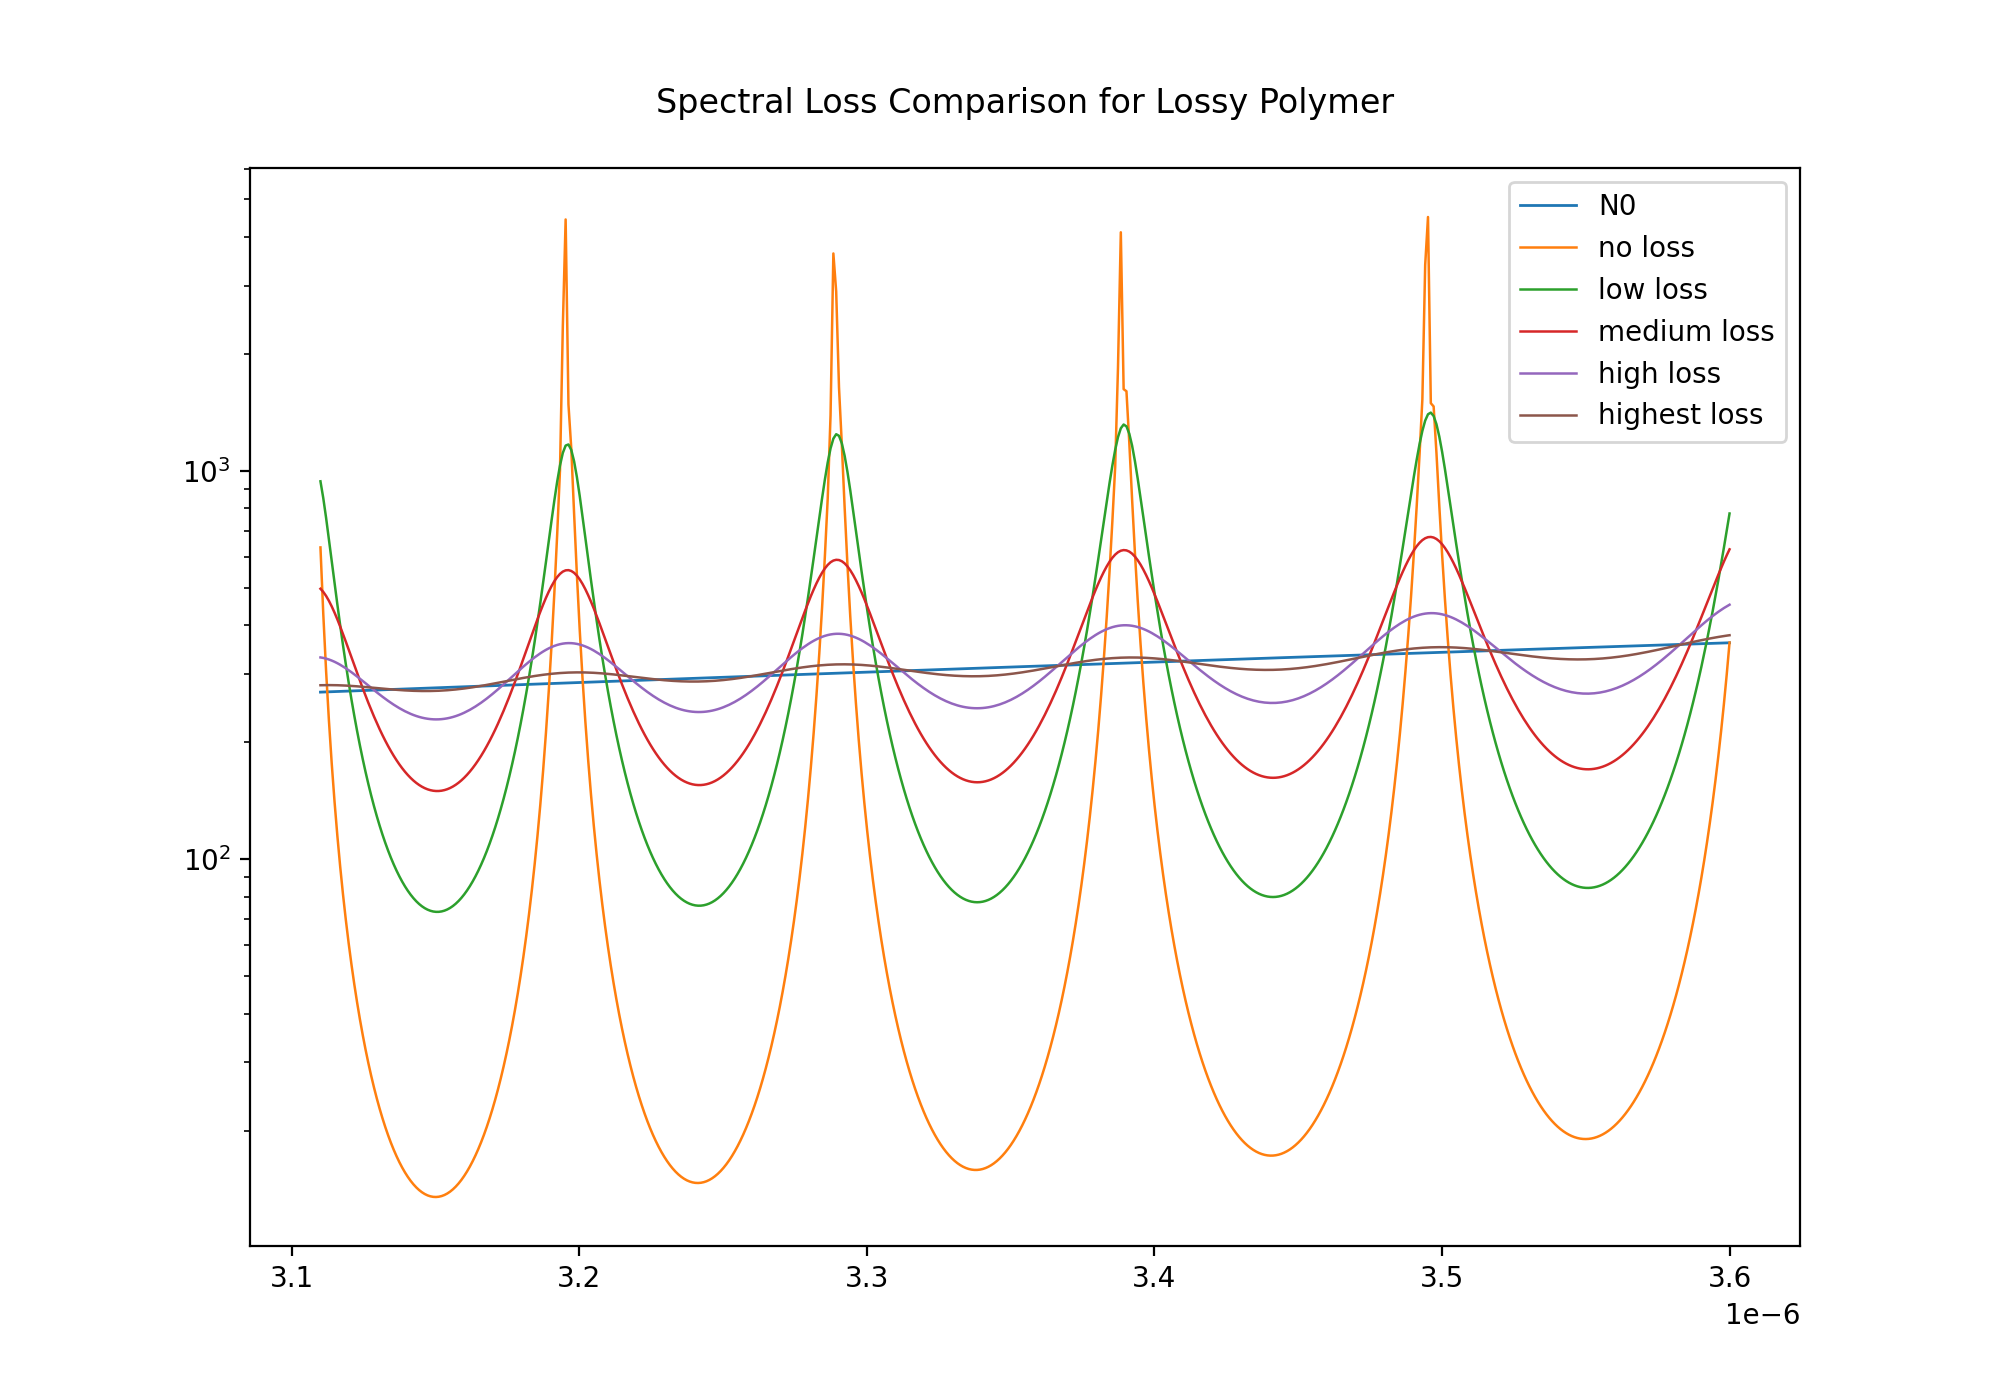

In [81]:
plt.figure(figsize=(10,7))
plt.plot(wls, N0, label='N0', linewidth=1)
plt.plot(wls, b1, label='no loss', linewidth=.9)
plt.plot(wls, b2, label='low loss', linewidth=.9)
plt.plot(wls, b3, label='medium loss', linewidth=.9)
plt.plot(wls, b4, label='high loss', linewidth=.9)
plt.plot(wls, b5, label='highest loss', linewidth=.9)
plt.legend()
plt.title("Spectral Loss Comparison for Lossy Polymer\n")
plt.yscale('log')

# Save for Paper

In [89]:
import os
paper_path = os.path.relpath(os.path.expanduser('~/papers/outer_materials/\
figures/data/bragg/poly'))

for k in [0, 0.002, 0.005, 0.01, 0.018, np.inf]:
    CL = 20 / np.log(10) * np.load('data/k_'+str(k)+'.npy')/A.scale
    both = np.column_stack((wls*1e6, CL))
    np.savetxt(paper_path + '/k_'+str(k)+'.dat', both, fmt='%.8f')
